<h1>Business Analytics Project</h1>

# Table of Contents <a id='back'></a>

* [Intro](#intro)
* [0. Opening data files](#data_review)
* [1. Data preprocessing](#data_preprocessing)
    * [1.1. general information](#general)
        * [Conclusions](#conclusions_1)
    * [1.2. data optimization](#optimization)
        * [Conclusions](#conclusions_2)
    * [1.3. column names](#columns)
        * [Conclusions](#conclusions_3)
    * [1.4. dates range](#dates)
        * [Conclusions](#conclusions_3_1)
    * [Data summary](#summary_1)
* [2. Reports and metrics](#metrics)
    * [2.1. Product](#product)
        * [2.1.1. number of customers (DAU, WAU, MAU)](#customers)
            * [Conclusions](#conclusions_4)
        * [2.1.2. number of sessions per day](sessions)
            * [Conclusions](#conclusions_5)
        * [2.1.3. session length](#session_length)
            * [Conclusions](#conclusions_6)
        * [2.1.4. user retention rate](#retention_rate)
            * [Conclusions](#conclusions_7)
    * [Product summary](#summary_2)
    * [2.2. Sales](#sales)
        * [2.2.1. cohorts conversions](#cohorts_conversions)
            * [2.2.1.1. conversion](#conversion)
            * [2.2.1.2. conversion time per marketing channel](#conversion_time)
            * [2.2.1.3. conversion rate](#conversion_rate)
            * [2.2.1.4. conversion rate per marketing channel](#conversion_channel)
            * [Conclusions](#conclusions_8)
        * [2.2.2. number of orders](#number_orders)
            * [Conclusions](#conclusions_9)
        * [2.2.3. average purchase size](#purchase_size)
            * [2.2.3.1. overall average check](#average_check)
            * [2.2.3.2. average check per customer](#customer_check)
            * [2.2.3.3. average check per month](#month_check)
            * [2.2.3.4. cohort analysis on the average check per month](#cohort_month_check)
            * [Conclusions](#conclusions_10)
        * [2.2.4. LTV](#LTV)
            * [Conclusions](#conclusions_11)
    * [Sales summary](#summary_3)
    * [2.3. Marketing](#marketing)
        * [2.3.1. money spent per source](#money_spent)
            * [2.3.1.1. overall marketing costs](#marketing_cost)
            * [2.3.1.2. marketing costs per source](#marketing_source)
            * [2.3.1.3. marketing costs per month](#marketing_month)
            * [2.3.1.4. marketing costs per month and source](#marketing_month_source)
            * [2.3.1.5. marketing costs vs MAU vs revenue per month](#marketing_comparison)
            * [Conclusions](#conclusions_12)
        * [2.3.2. customer acquisition cost](#customer_cost)
            * [2.3.2.1. CAC per source](#cac_source)
            * [2.3.2.2. CAC vs conversion rate per source](#cac_conversion)
            * [2.3.2.3. CAC per month](#cac_month)
            * [2.3.2.4. CAC vs average check per month](#cac_check)
            * [2.3.2.5. CAC per source per month](#cac_source_month)
            * [Conclusions](#conclusions_13)
        * [2.3.3. ROI](#ROI)
            * [2.3.3.1. ROI per cohort](#ROI_cohort)
            * [2.3.3.2. ROMI per source](#ROI_source)
            * [Conclusions](#conclusions_14)
    * [Marketing summary](#summary_4)   
* [3. Recommendations](#recommendations)
    * [3.1. Product recommendations](#recommendations_product)
    * [3.2. Sales recommendations](#recommendations_sales)
    * [3.3. Marketing recommendations](#recommendations_marketing)

<h1>Intro</h1> <a id='intro'></a>

This project works with the following data from Yandex.Afisha:
- server logs with data on visits from June 2017 through May 2018
- dump file with all orders for the period
- marketing expenses statistics

__Purpose:__
* contribute to the optimization of marketing spendings

__Tasks:__
- explore customers behavior in terms of visiting the website and making purchases
- figure out how customers use the product (how often, for how long)
- find how many orders each customer makes and how much money it brings
- evaluate how much it costs to attract a new customer
- determine what advertising sources bring the most buyers
- calculate when a customer pays off

__Main steps:__
- download the data, optimize and preprocess it for analysis
- calculate the main metrics and make reports for product, sales and marketing
- give marketing experts recommendations on how much money to invest and where

<h1>0. Opening data files</h1> <a id='data_review'></a>

In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
try:
    visit=pd.read_csv('visits_log_us.csv')
    order=pd.read_csv('orders_log_us.csv')
    expense=pd.read_csv('costs_us.csv')
except:
    visit=pd.read_csv('/datasets/visits_log_us.csv')
    order=pd.read_csv('/datasets/orders_log_us.csv')
    expense=pd.read_csv('/datasets/costs_us.csv')

[Back to Contents](#back)

<h1>1. Data preprocessing</h1> <a id='data_preprocessing'></a>

<h2>1.1. general information</h2> <a id='general'></a>

Checking the general information about each table, including the memory usage.

In [12]:
print('{}VISITS{}'.format('\033[1m', '\033[0m'))
print('The number of duplicated rows is:', visit.duplicated().sum())
display(visit.head())
visit.info(memory_usage='deep')
print('===========================================================')
print('{}ORDERS{}'.format('\033[1m', '\033[0m'))
print('The number of duplicated rows is:', order.duplicated().sum())
display(order.head())
order.info(memory_usage='deep')
print('===========================================================')
print('{}EXPENSES{}'.format('\033[1m', '\033[0m'))
print('The number of duplicated rows is:', expense.duplicated().sum())
display(expense.head())
expense.info(memory_usage='deep')

VISITS
The number of duplicated rows is: 0


Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB
ORDERS
The number of duplicated rows is: 0


Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB
EXPENSES
The number of duplicated rows is: 0


source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [13]:
# analysing the column Device in the table visits
# using the method value_counts() to find the number of unique values in the column and how they are distributed
visit['Device'].value_counts()

Device
desktop    262567
touch       96833
Name: count, dtype: int64

This column has only two values: desktop and touch. These are device categories: computers and touch screen devices. \
The data type of this column should be converted from object to category to optimize memory usage. \
This can be done in 2 ways:
1. using the method astype('category'): \
visit['Device'] = visit['Device'].astype('category')
2. using the parameter dtype of the method pd.read_csv(): \
visit=pd.read_csv('visits_log_us.csv', dtype={'Device': 'category'})

<h3>Conclusions</h3> <a id='conclusions_1'></a>

*__1. Missing & duplicate values__*
* all 3 tables have no missing values
* all 3 tables have no duplicate values

*__2. Data types__*
* all 3 tables have columns where the data types should be changed as follows

Table visits
* Device: from object to category
* End Ts: from object to datetime
* Start Ts: from object to datetime

Table orders
* Buy Ts: from object to datetime

Table expenses
* dt: from object to datetime

*__3. Column names__*
* the column names in the tables visits and orders should be corrected as follows:
    * change uppercase to lowercase
    * use snake_case naming convention
* the column names in the table expenses are correct

[Back to Contents](#back)

<h2>1.2. data optimization</h2> <a id='optimization'></a>

Using these parameters of the pd.read_csv() method to optimize data:
* dtype to convert the column Device (table visits) data to the category type
* parse_dates to convert columns with dates to the datetime type

In [18]:
try:
    visit=pd.read_csv('visits_log_us.csv', parse_dates=['Start Ts', 'End Ts'], dtype={'Device': 'category'})
    order=pd.read_csv('orders_log_us.csv', parse_dates=['Buy Ts'])
    expense=pd.read_csv('costs_us.csv', parse_dates=['dt'])
except:
    visit=pd.read_csv('/datasets/visits_log_us.csv', parse_dates=['Start Ts', 'End Ts'], dtype={'Device': 'category'})
    order=pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])
    expense=pd.read_csv('/datasets/costs_us.csv', parse_dates=['dt'])

Checking the result.

In [20]:
print('{}VISITS{}'.format('\033[1m', '\033[0m'))
display(visit.head())
visit.info(memory_usage='deep')
print('========================================')
print('{}ORDERS{}'.format('\033[1m', '\033[0m'))
display(order.head())
order.info(memory_usage='deep')
print('========================================')
print('{}EXPENSES{}'.format('\033[1m', '\033[0m'))
display(expense.head())
expense.info(memory_usage='deep')

VISITS


Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
ORDERS


Buy Ts  Revenue                   Uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
EXPENSES


source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [21]:
# making copies of the dataframes to work with them further
visits = visit.copy()
orders = order.copy()
expenses = expense.copy()

<h3>Conclusions</h3> <a id='conclusions_2'></a>

* The data type of the column Device from the table visits is changed to category.
* All columns containing dates are converted from object to datetime data type.
* The memory usage is reduced.

[Back to Contents](#back)

<h2>1.3. column names</h2> <a id='columns'></a>

In [24]:
# renaming the columns in the table visits
visits=visits.rename(columns={'Device': 'device', 'End Ts': 'end_ts', 'Source Id': 'source_id', 'Start Ts': 'start_ts', 'Uid':'uid'})
# checking the result
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [25]:
# making all column names in the table orders lowercase
orders.columns=orders.columns.str.lower()

In [26]:
# changing the column buy ts in the table orders to the snake_case
orders.rename(columns={"buy ts": "buy_ts"}, inplace=True)
# checking the result
orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

<h3>Conclusions</h3> <a id='conclusions_3'></a>

* The column names in the tables visits and orders are changed to lowercase.
* All column names are also formatted according to the snake_case naming convention.

[Back to Contents](#back)

<h2>1.4. dates range</h2> <a id='dates'></a>

The dataset contains server logs with data on Yandex.Afisha visits from June 2017 through May 2018. \
Checking all tables to see if the data is within this range.

In [30]:
#checking the dates range of the table visits
print('The first app visit occured on:', visits['start_ts'].min())
print('The last app visit occured on:', visits['start_ts'].max())

The first app visit occured on: 2017-06-01 00:01:00
The last app visit occured on: 2018-05-31 23:59:00


In [31]:
visits[['start_ts', 'end_ts']].describe()

start_ts                         end_ts
count                         359400                         359400
mean   2017-12-18 06:17:32.010517760  2017-12-18 06:28:15.036205056
min              2017-06-01 00:01:00            2017-06-01 00:02:00
25%              2017-10-15 09:41:00            2017-10-15 09:45:45
50%              2017-12-18 18:46:00            2017-12-18 18:59:30
75%              2018-02-28 09:54:00            2018-02-28 10:08:15
max              2018-05-31 23:59:00            2018-06-01 01:26:00

There are no sessions that started after the 31st of May 2018.
But there are sessions that ended on the 1st of June 2018.

In [33]:
visits[visits['start_ts'] > '2018-05-31 23:59:00']['uid'].count()

0

In [34]:
visits[visits['end_ts'] > '2018-05-31 23:59:00']['uid'].count()

12

The number of sessions ended on the 1st of June 2018 is 12. \
These are the sessions that started before the 1st of June 2018. \
This will not influence the calculations of the product metrics.

In [36]:
#checking the dates range of the table orders
orders['buy_ts'].describe()

count                            50415
mean     2017-12-20 05:14:24.846176768
min                2017-06-01 00:10:00
25%                2017-10-13 17:28:00
50%                2017-12-21 14:12:00
75%                2018-03-02 16:10:00
max                2018-06-01 00:02:00
Name: buy_ts, dtype: object

In [37]:
orders[orders['buy_ts'] > '2018-05-31 23:59:00']['uid'].count()

1

There is one order placed on the 1st of June 2018. \
This date is an outlier and should be removed from the table not to influence the sales metrics calculations.

In [39]:
outlier = orders[orders['buy_ts'] > '2018-05-31 23:59:00']
outlier

buy_ts  revenue                uid
50414 2018-06-01 00:02:00     3.42  83872787173869366

In [40]:
# removing the outlier from the table orders
orders = orders.drop(outlier.index)

In [41]:
# checking the result
orders[orders['buy_ts'] > '2018-05-31 23:59:00']

Empty DataFrame
Columns: [buy_ts, revenue, uid]
Index: []

In [42]:
orders['buy_ts'].describe()

count                            50414
mean     2017-12-20 05:09:45.867021312
min                2017-06-01 00:10:00
25%                2017-10-13 17:27:00
50%                2017-12-21 14:08:00
75%                2018-03-02 16:09:30
max                2018-05-31 23:56:00
Name: buy_ts, dtype: object

In [43]:
#checking the dates range of the table expenses
expenses['dt'].describe()

count                             2542
mean     2017-11-29 09:04:57.403619072
min                2017-06-01 00:00:00
25%                2017-08-30 00:00:00
50%                2017-11-29 00:00:00
75%                2018-02-28 00:00:00
max                2018-05-31 00:00:00
Name: dt, dtype: object

<h3>Conclusions</h3> <a id='conclusions_3_1'></a>

* In the table visits there are 12 sessions that ended on the 1st of June 2018.
* Although this date is out of dataset range, there is no need to exclude these sessions from the table since they have no influence on the product metrics calculations.
* In the table orders there was one order placed on the 1st of June 2018.
* This date is an outlier and was removed from the table not to influence the sales metrics calculations.
* In the table expenses there are no date outliers.

<h2>Data summary</h2> <a id='summary_1'></a>

1. The data on customers visits, orders, and expenses is stored in the corresponding variables.
2. The dataset has no missing or duplicate values.
3. The columns data types are converted to the correct ones.
4. The column names are formatted according to the snake_case naming style.
5. The date outlier 2018-06-01 was removed from the table orders.
6. The data is optimized and prepared for the analysis.

[Back to Contents](#back)

<h1>2. Reports and metrics</h1> <a id='metrics'></a>

<h2>2.1. Product</h2> <a id='product'></a>

<h3>2.1.1. number of customers (DAU, WAU, MAU)</h3> <a id='customers'></a>

How many people use it every day, week, and month?

In [50]:
# creating separate columns for the day, week, and month values
visits['session_day'] = visits['start_ts'].values.astype('datetime64[D]')
visits['session_week']  = visits['start_ts'].values.astype('datetime64[W]')
visits['session_month'] = visits['start_ts'].values.astype('datetime64[M]')

In [51]:
# calculating user activity metrics by grouping the data by session day/week/month
dau = visits.groupby('session_day')['uid'].nunique().reset_index()
wau = visits.groupby('session_week')['uid'].nunique().reset_index()
mau = visits.groupby('session_month')['uid'].nunique().reset_index()

In case the latest pandas version is used: the behavior of DatetimeProperties.to_pydatetime is deprecated. To retain the old behavior, call np.array on the result: \
dau = np.array(visits.groupby('session_day')['uid'].nunique()) \
wau = np.array(visits.groupby('session_week')['uid'].nunique()) \
mau = np.array(visits.groupby('session_month')['uid'].nunique())

In [53]:
# renaming columns
dau.columns = ['session_day', 'number_customers']
wau.columns = ['session_week', 'number_customers']
mau.columns = ['session_month', 'number_customers']

To visualize the number of customers in dynamics, the plotly library is used.

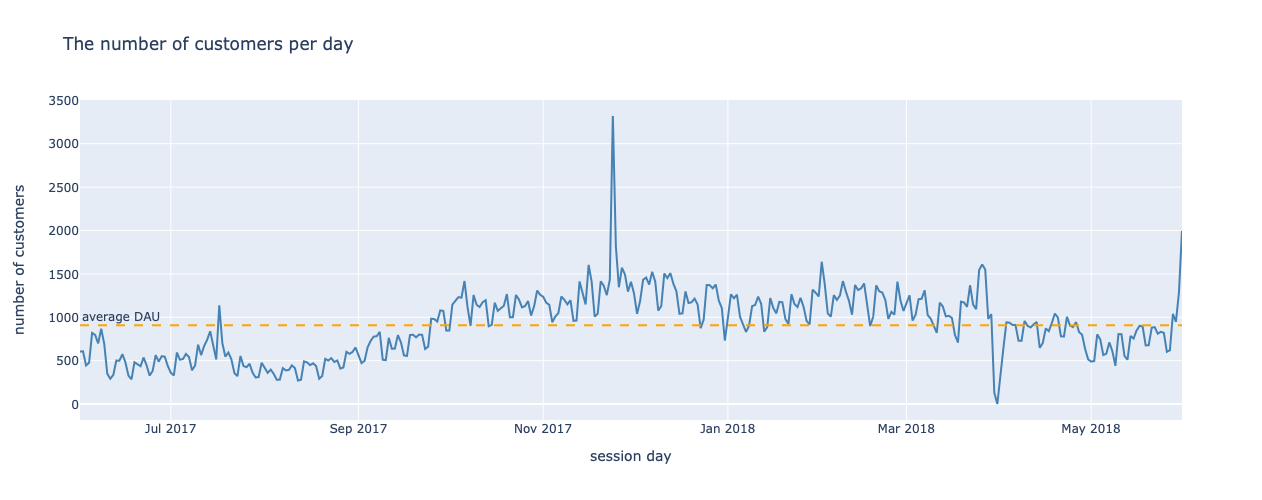

In [55]:
# daily active users (DAU)
fig_dau = px.line(dau, x='session_day', y='number_customers', title='The number of customers per day',  width=1200, height=500)
fig_dau.update_layout(xaxis_title = 'session day', yaxis_title = 'number of customers', showlegend=False)
fig_dau.update_traces(line_color='steelblue')
#adding reference line with the average DAU over time
fig_dau.add_hline(y=dau['number_customers'].mean(),line_dash="dash", line_color="orange", annotation_text="average DAU", annotation_position="top left")
fig_dau.show()

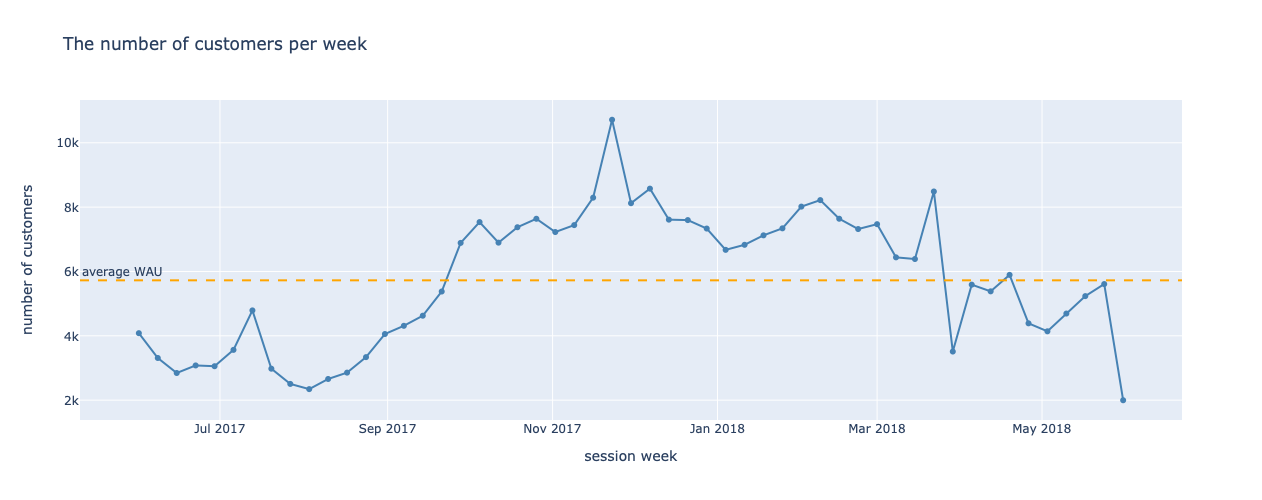

In [56]:
# weekly active users (WAU)
fig_wau = px.line(wau,  x='session_week', y='number_customers', title='The number of customers per week',  markers=True, width=1200, height=500)
fig_wau.update_layout(xaxis_title = 'session week', yaxis_title = 'number of customers', showlegend=False)
fig_wau.update_traces(line_color='steelblue')
#adding reference line with the average WAU over time
fig_wau.add_hline(y=wau['number_customers'].mean(),line_dash="dash", line_color="orange", annotation_text="average WAU", annotation_position="top left")
fig_wau.show()

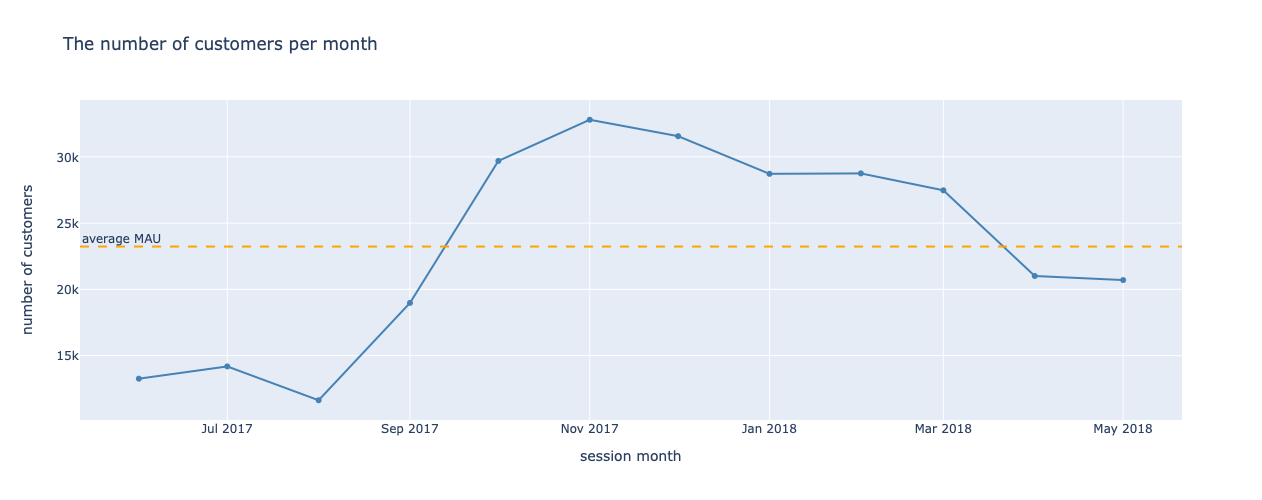

In [57]:
# monthly active users (MAU)
fig_mau = px.line(mau, x='session_month', y='number_customers', title='The number of customers per month', markers=True,  width=1200, height=500)
fig_mau.update_layout(xaxis_title = 'session month', yaxis_title = 'number of customers', showlegend=False)
fig_mau.update_traces(line_color='steelblue')
#adding reference line with the average MAU over time
fig_mau.add_hline(y=mau['number_customers'].mean(),line_dash="dash", line_color="orange", annotation_text="average MAU", annotation_position="top left")
fig_mau.show()

<h3>Conclusions</h3> <a id='conclusions_4'></a>

* On average, 908 people visit the website daily, 5724 per week, and 23228 per month.
* The daily number of users stays below average from June until the end of September and from the end of March until the end of May.
* From October until the end of March the amount of users stays above average.
* The peak number of customers visiting the website was during 2 days: on the 24th of November 2017 and the 31st of May 2018. \
  This can be due to events that took place on these days (e.g. popular artists performances).

* More customers visit the website during autumn and winter months. \
  This can be due to seasonal conditions, when people tend to spend more time on indoor activities rather than being outside.
* In spring the activity starts to decrease, with the least number of active users during summer time. \
  This can be explained by seasonal conditions as well, when people prefer outdoor activities and go on vacations.

[Back to Contents](#back)

<h3>2.1.2. number of sessions per day</h3> <a id='sessions'></a>

How many sessions are there per day? \
One user might have more than one session.

In [61]:
# calculating the number of sessions per day
sessions_per_day = visits.groupby(['session_day'])['uid'].count().reset_index()
sessions_per_day.columns = ['session_day', 'number_sessions']
display(sessions_per_day)

session_day  number_sessions
0    2017-06-01              664
1    2017-06-02              658
2    2017-06-03              477
3    2017-06-04              510
4    2017-06-05              893
..          ...              ...
359  2018-05-27              672
360  2018-05-28             1156
361  2018-05-29             1035
362  2018-05-30             1410
363  2018-05-31             2256

[364 rows x 2 columns]

To visualize the number of sessions per day, the plotly line chart is used.

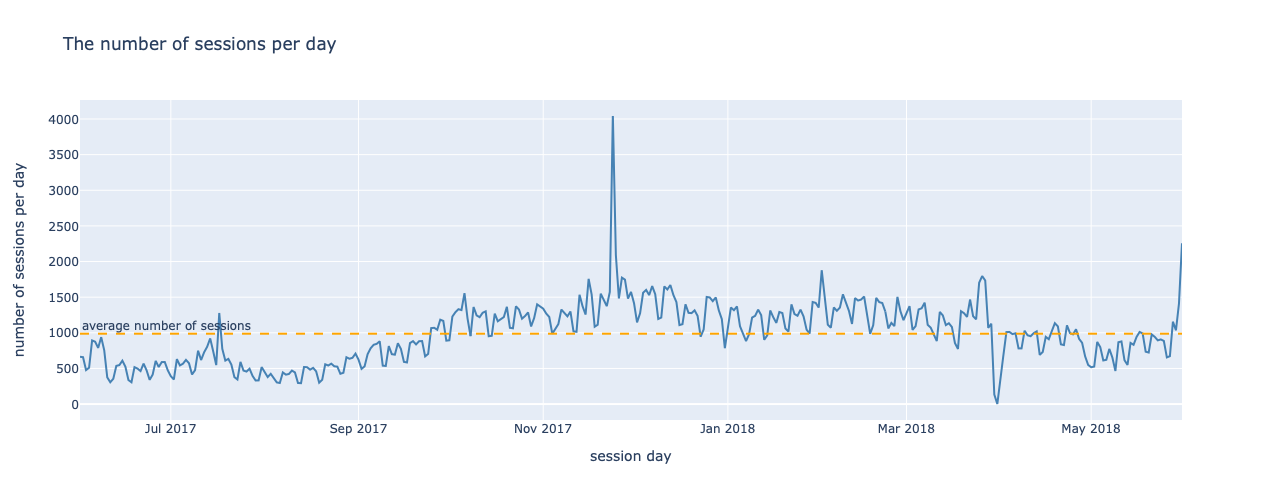

In [63]:
fig_sd = px.line(sessions_per_day, x='session_day', y='number_sessions', title='The number of sessions per day', width=1200, height=500)
fig_sd.update_layout(xaxis_title = 'session day', yaxis_title = 'number of sessions per day', showlegend=False)
fig_sd.update_traces(line_color='steelblue')
#adding reference line with the average number of sessions per day over time
fig_sd.add_hline(y=sessions_per_day['number_sessions'].mean(),line_dash="dash", line_color="orange", annotation_text="average number of sessions", annotation_position="top left")
fig_sd.show()

To check how the number of sessions per day correlates with the number of unique visitors per day, the 2 line graphs are plotted together.

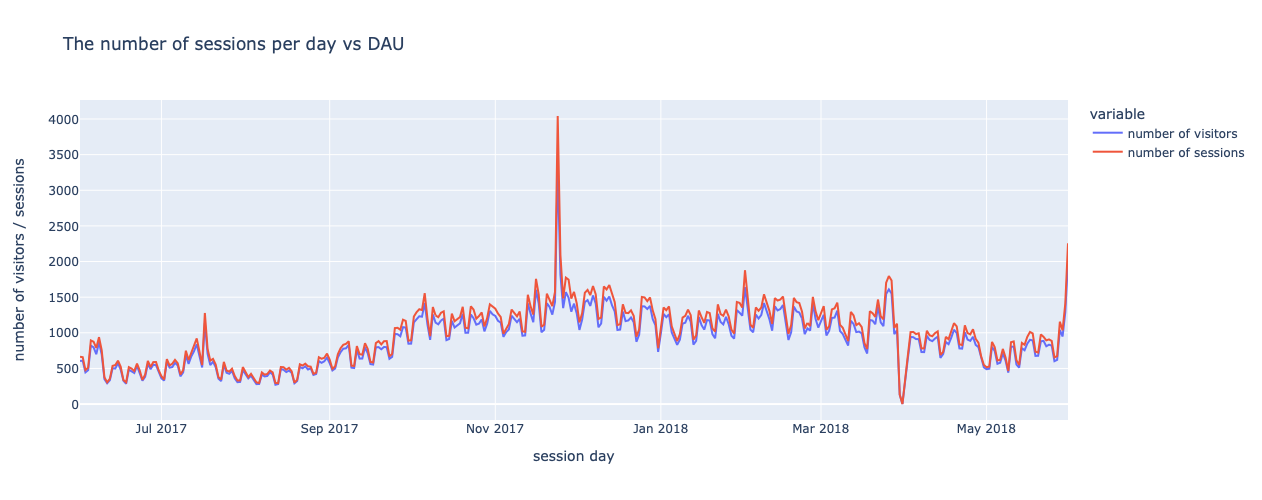

In [65]:
# comparing the number of sessions per day with the number of unique visitors per day
fig_dau_sessions = px.line(dau, x='session_day', y=[dau['number_customers'], sessions_per_day['number_sessions']], title='The number of sessions per day vs DAU', width=1200, height=500)
fig_dau_sessions.update_layout(xaxis_title = 'session day', yaxis_title = 'number of visitors / sessions')
fig_dau_sessions.update_traces({'name': 'number of visitors'}, selector={'name': 'number_customers'})
fig_dau_sessions.update_traces({'name': 'number of sessions'}, selector={'name': 'wide_variable_1'})
fig_dau_sessions.show()

# --------------------------------
# an alternative way to plot this:
#fig = px.line(dau, x='session_day', y='number_customers', width=1200, height=500)
#fig.update_layout(xaxis_title = 'session day', yaxis_title = 'number of customers (blue) / sessions (red)')
#fig.add_scatter(x=sessions_per_day['session_day'], y=sessions_per_day['number_sessions'], mode='lines')
#fig.show()

In [66]:
# comparing the average number of sessions per day with the average number of unique visitors per day
print('The average number of sessions per day is:', int(sessions_per_day['number_sessions'].mean()))
print('The average number of visitors per day is:', int(dau['number_customers'].mean()))

The average number of sessions per day is: 987
The average number of visitors per day is: 907


In [67]:
# calculating the number of sessions per user per day
sessions_per_user = (sessions_per_day['number_sessions'] / dau['number_customers']).reset_index()
sessions_per_user.columns = ['session_day', 'sessions_per_user']
display(sessions_per_user)

session_day  sessions_per_user
0              0           1.097521
1              1           1.082237
2              2           1.071910
3              3           1.071429
4              4           1.089024
..           ...                ...
359          359           1.083871
360          360           1.112608
361          361           1.091772
362          362           1.093871
363          363           1.129695

[364 rows x 2 columns]

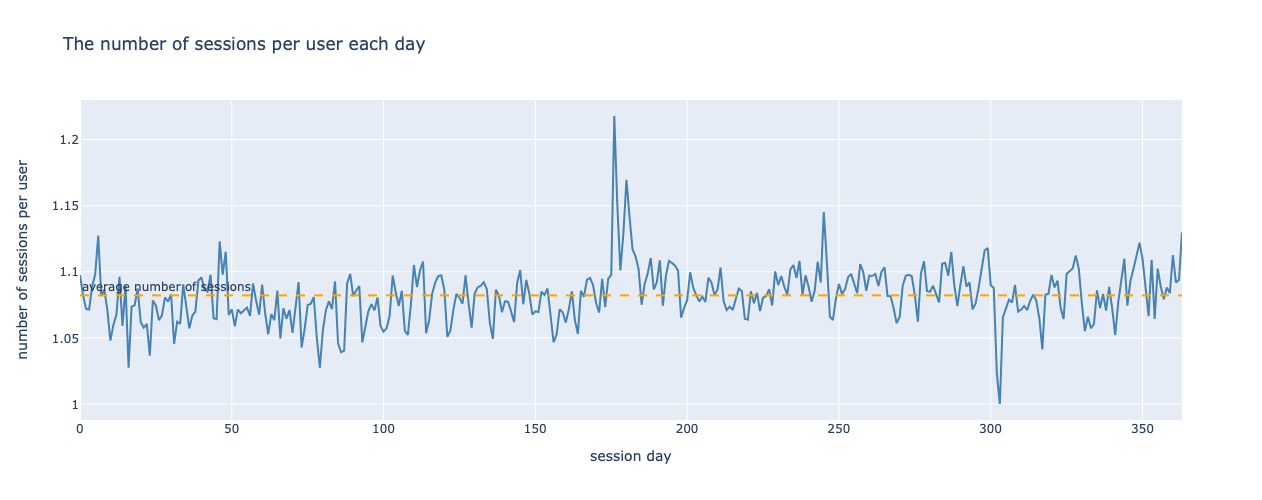

In [68]:
# visualizing the number of sessions per user per day
fig_ud = px.line(sessions_per_user, x='session_day', y='sessions_per_user', title='The number of sessions per user each day', width=1200, height=500)
fig_ud.update_layout(xaxis_title = 'session day', yaxis_title = 'number of sessions per user', showlegend=False)
fig_ud.update_traces(line_color='steelblue')
#adding reference line with the average number of sessions per user over time
fig_ud.add_hline(y=sessions_per_user['sessions_per_user'].mean(),line_dash="dash", line_color="orange", annotation_text="average number of sessions", annotation_position="top left")
fig_ud.show()

In [69]:
# calculating the average number of sessions per user per day
print('The average number of sessions per user each day is:', int(sessions_per_user['sessions_per_user'].mean()))

The average number of sessions per user each day is: 1


In [70]:
# exploring the distribution of the sessions number per user per day
sessions_per_user['sessions_per_user'].describe()

count    364.000000
mean       1.082170
std        0.020876
min        1.000000
25%        1.070321
50%        1.082488
75%        1.093876
max        1.217837
Name: sessions_per_user, dtype: float64

<h3>Conclusions</h3> <a id='conclusions_5'></a>

* The number of sessions per day grows steadily from August until November, then stays on the same level above average until April, and from April it drops below average until August.

* The number of sessions per day follows the same seasonal pattern as the number of unique visitors per day.

* Moreover,  the dynamics of total sessions per day is exactly the same as the dynamics of daily active users. \
  These 2 graphs almost totally coincide and their average numbers are pretty close to each other (987 and 907).

* On average, a customer has 1 session a day.

* The graph of the number of sessions per user per day has peaks and lows, but the range of values in only between 1 and 1.2: \
  the minimum number of sessions per user per day is 1, while the maximum is 1.2.

* Although the number of sessions per day varies a lot, the number of sessions per user stays almost the same every day: 1 session per day.

* So the peak values in the amount of sessions per day are due to the increased number of visitors on those days and not because each customer interacted more with the website (had more sessions) on these days.

[Back to Contents](#back)

<h3>2.1.3. session length</h3> <a id='session_length'></a>

What is the length of each session?

In [74]:
# finding the length of each session
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

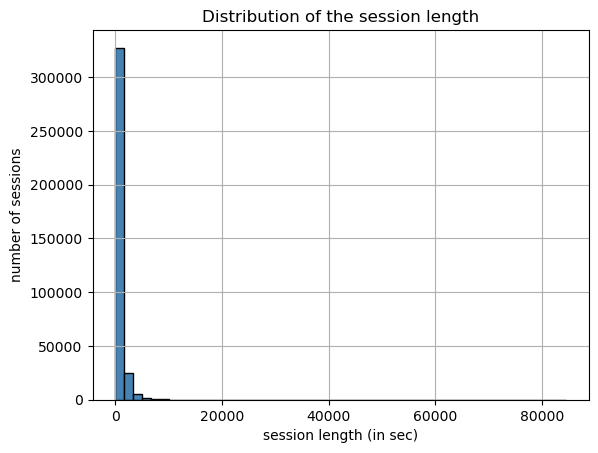

In [75]:
# plotting a histogram to check the distribution of the session length
plt.hist(visits['session_duration_sec'], bins=50, color='steelblue', edgecolor='black')
plt.xlabel('session length (in sec)')
plt.ylabel('number of sessions')
plt.title('Distribution of the session length')
plt.grid()
plt.show()

According to the plot, the session lengths aren't't evenly distributed. \
In skewed distributions, the median or mode are the best measures because they are unaffected by extreme outliers or non-symmetric distribution of values. \
Since here it is not a normal distribution, the average session length will be calculated using mode() instead of mean().

Mean - the average value. \
Mode - the most common value, the value that appears most often. \
Median - the mid point value (can only be used on data that can be ordered).

In [77]:
# finding the overall average session length and the value that appears most often in the column.
# ASL (average session length) =  length of all sessions.mode() = (session end – session start).mode()
asl = int(visits['session_duration_sec'].median())
mode = int(visits['session_duration_sec'].mode())
print('The average session length is:', asl, 'seconds.')
print('The most common session length is:', mode, 'seconds.')

The average session length is: 300 seconds.
The most common session length is: 60 seconds.


In [78]:
# checking the distribution of the session lenght
visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

In [79]:
# finding the average session length per day
duration_per_day = visits.groupby(['session_day'])['session_duration_sec'].median().reset_index()
duration_per_day.columns = ['session_day', 'session_duration']
display(duration_per_day)

session_day  session_duration
0    2017-06-01             300.0
1    2017-06-02             300.0
2    2017-06-03             300.0
3    2017-06-04             240.0
4    2017-06-05             300.0
..          ...               ...
359  2018-05-27             300.0
360  2018-05-28             240.0
361  2018-05-29             300.0
362  2018-05-30             300.0
363  2018-05-31             360.0

[364 rows x 2 columns]

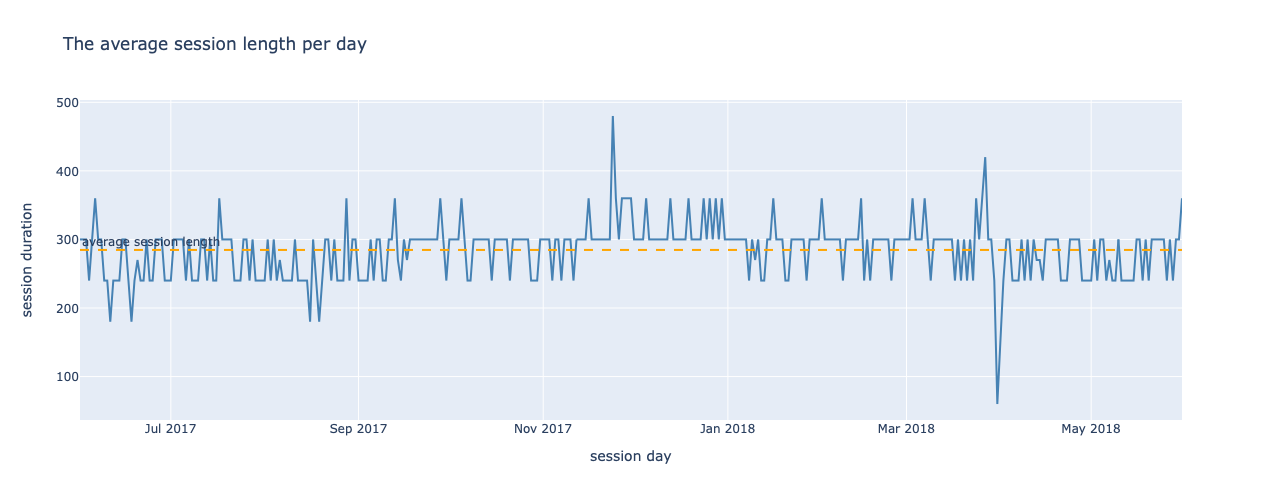

In [80]:
# visualizing the average session length per day using a line chart
fig_sl = px.line(duration_per_day, x='session_day', y='session_duration', title='The average session length per day', width=1200, height=500)
fig_sl.update_layout(xaxis_title = 'session day', yaxis_title = 'session duration', showlegend=False)
fig_sl.update_traces(line_color='steelblue')
#adding reference line with the average session length
fig_sl.add_hline(y=duration_per_day['session_duration'].mean(),line_dash="dash", line_color="orange", annotation_text="average session length", annotation_position="top left")
fig_sl.show()

<h3>Conclusions</h3> <a id='conclusions_6'></a>

* The session length doesn't follow normal distribution, so the median value is used for further analysis.
* The average session lenght is not changing much over days.
* On average, most of the time users spend between 4 and 6 minutes on a session.
* Overall, most frequently the session lasts only 1 minute.

[Back to Contents](#back)

<h3>2.1.4. user retention rate</h3> <a id='retention_rate'></a>

What's the user retention rate?

To calculate the user retention rate, it is necessary to form cohorts. \
A cohort is formed by defining the event & the period :
* event: the date the user was first active in the app.
* period: month, since the dataset contains data for the period of 1 year.

Each customer will be assigned a month when he used the app for the first time.

__Defining the event of the cohort by:__
* finding the first session for each customer, and
* storing the event in a new column in the table visits.

In [86]:
visits['first_visit'] = visits.groupby('uid')['start_ts'].transform('min')

__Defining the period of the cohort by:__
* turning the date of registration into month to understand to which cohort the customer belongs to, and
* finding the difference between any current session and the first session to calculate the customers lifetime within the cohort.

In [88]:
visits['cohort'] = visits['first_visit'].values.astype('datetime64[M]')
visits['lifetime'] = (visits['start_ts'].values.astype('datetime64[M]') - visits['first_visit'].values.astype('datetime64[M]')).astype(int)

Alternative ways to calculate the customers lifetime:
1. visits['lifetime'] = visits['start_ts'].dt.to_period('M').astype(int) - visits['first_visit'].dt.to_period('M').astype(int)
2. visits['lifetime'] = ((visits['start_ts'] - visits['first_visit']) / np.timedelta64(1, 'D') / 30.4375).round().astype('int')

In the latest versions NumPy doesn't support 'M' (months). \
As a solution:
* the timedelta is converted to days, and
* the number of months is calculated by dividing by the average number of days in a month 30.4375.

The retention rate can be found in 2 ways.

Method 1:
1. group the data by cohort and lifetime & find the number of active customers at a certain lifetime month for each cohort \
monthly_cohorts = (visits.groupby(['cohort', 'lifetime']).agg({'uid': 'nunique'}).reset_index())
2. find the initial number of customers in each cohort (the number of customers in the 0th month) \
initial_count = monthly_cohorts[monthly_cohorts['lifetime'] == 0][['cohort', 'uid']]
3. rename the uid column as cohort_customers \
initial_count = initial_count.rename(columns={'uid': 'cohort_customers'})
4. join the initial number of customers in the cohort with the data on cohorts \
monthly_cohorts = monthly_cohorts.merge(initial_count, on='cohort')
5. calculate the retention rate by dividing the number of customers in each lifetime month by the initial number of customers in the cohort \
monthly_cohorts['retention'] = monthly_cohorts['uid'] / monthly_cohorts['cohort_customers']
6. compile a pivot table with the customers retention rate \
retention_pivot = monthly_cohorts.pivot_table(index='cohort', columns='lifetime', values='retention', aggfunc='sum')

Method 2 (is used here):
1. compile a pivot table (cohort_pivot) with the number of unique customers per each cohort for every lifetime value
2. calculate the retention rate by dividing the number of customers in each lifetime month by the initial number of customers in the cohort:
    * the column lifetime=0 (cohort_pivot[0]) includes the initial number of customers registered in a cohort
        * axis=0 performs the action (division) per row
    * the other columns with the lifetime values (cohort_pivot.iloc[:,0:]) show the number of customers in each lifetime month
        * df.iloc[:,0:] selects all rows and columns, except for the column 0.
    * retention rate = the number of unique customers in each month / the initial number of customers in the cohort * 100%

In [92]:
cohort_pivot = visits.pivot_table(index='cohort', columns='lifetime', values='uid', aggfunc='nunique')
retention_rate = cohort_pivot.iloc[:,0:].div(cohort_pivot[0], axis=0)*100

An alternative way to create the cohort table & calculate the retention rates: \
cohort_table = pd.crosstab(visits['cohort'], visits['lifetime'], values=visits['uid'], aggfunc='nunique') \
retention_rates = cohort_table.divide(cohort_table.iloc[:, 0], axis=0) * 100

To visualize the retention rate, the seaborn and matplotlib libraries are used.

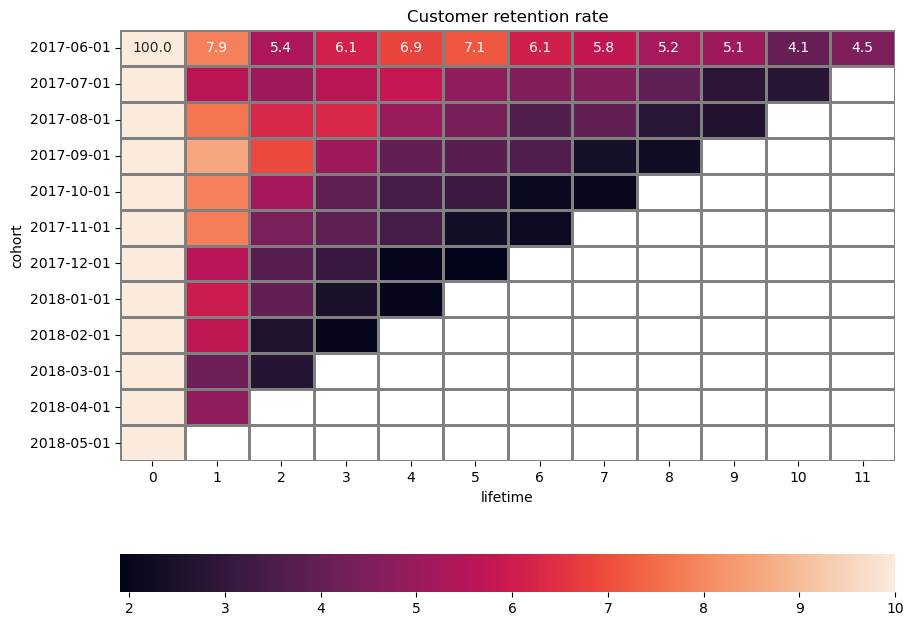

In [95]:
plt.figure(figsize=(10, 8))
plt.title('Customer retention rate')
retention_rate.index=retention_rate.index.astype(str)
sns.heatmap(retention_rate, annot=True, fmt='.1f', linewidths=1, linecolor='grey', vmax=10, cbar_kws= {'orientation': 'horizontal'})
plt.show()

<h3>Conclusions</h3> <a id='conclusions_7'></a>

* The retention rate shows how many customers come back. \
  It is a percentage of those who returned from those who registered. \
  To calculate it:
    * the customers were grouped into monthly cohorts, based on the date of their first visit,
    * the heatmap was used to visualize how many users were active on a certain month after the first visit.


* The cohort from September shows the highest retention both on the 1st and the 2nd months.

* Starting from the 4th month, the June cohort keeps the leading position in retention.

* Winter and spring cohorts have a lower retention rate compared to summer and autumn cohorts. \
  Probably, people who start using the website services in winter and spring are occasional users who want to find an extra activity due to reduced outdoor activities at those months, while those who started using the services during summer and autumn are explicitly interested in such events, so their activity does not depend on the time of the year.

* Overall, the retention rate drops as customer’s lifetime increases. But there are 2 tendencies here:
    * for summer cohorts the rate reduces twice by the end of cohorts lifetime
    * for other cohorts the rate drops 3-4 times by the end of their lifetime

[Back to Contents](#back)

<h2>Product summary</h2> <a id='summary_2'></a>

1. On average, 908 people visit the website daily, 5724 per week, and 23228 per month.
2. The peak number of visitors was during 2 days: on the 24th of November 2017 and the 31st of May 2018.
3. The weekly amount of users stays above average from October until the end of March.
4. The number of monthly visits has seasonal effect: lots of customers during autumn and winter months, less in spring, and the least number in summer.
5. On average, a customer has 1 session per day.
6. The number of sessions per day follows exactly the same seasonal pattern as the number of visitors per day.
7. Most frequently the session lasts only 1 minute.
8. On average, a user spends between 4 and 6 minutes on a session.
9. The average session lenght is not changing much over time.
10. The September cohort has the highest retention both on the 1st and the 2nd months.
11. The June cohort takes the leading position in retention starting from the 4th month.
12. Winter and spring cohorts have a lower retention rate compared to summer and autumn cohorts.
13. The retention rate drops as customer’s lifetime increases, with 2 tendencies here:
    * for summer cohorts the rate reduces twice by the end of cohorts lifetime
    * for other cohorts the rate drops 3-4 times by the end of their lifetime

[Back to Contents](#back)

<h2>2.2. Sales</h2> <a id='sales'></a>

<h3>2.2.1. cohorts conversions</h3> <a id='cohorts_conversions'></a>

When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)

<h4>2.2.1.1. conversion</h4> <a id='conversion'></a>

How long it takes from the first visit (registration) to the purchase in days. \
To find the conversion time, it is necessary to:
* find the date of the first visit for each customer (from the table visits)
* find the date of the first order for each customer (from the table orders)
* merge this data together
* calculate the conversion

In [103]:
# finding the date of the first visit for each customer
first_visit = visits.groupby('uid')['start_ts'].min().reset_index()
first_visit.columns = ['uid', 'first_visit']
first_visit.head()

uid         first_visit
0   11863502262781 2018-03-01 17:27:00
1   49537067089222 2018-02-06 15:55:00
2  297729379853735 2017-06-07 18:47:00
3  313578113262317 2017-09-18 22:49:00
4  325320750514679 2017-09-30 14:29:00

In [104]:
# finding the date of the first order for each customer
first_order = orders.groupby('uid')['buy_ts'].min().reset_index()
first_order.columns = ['uid', 'first_order']
first_order.head()

uid         first_order
0   313578113262317 2018-01-03 21:51:00
1  1575281904278712 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 18:33:00
3  2464366381792757 2018-01-28 15:54:00
4  2551852515556206 2017-11-24 10:14:00

In [105]:
# merging these 2 tables together
purchases = first_order.merge(first_visit, how='left',on=['uid'])
purchases.head()

uid         first_order         first_visit
0   313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 18:33:00 2017-10-11 17:14:00
3  2464366381792757 2018-01-28 15:54:00 2018-01-27 20:10:00
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00

In [106]:
# checking if merging did not create duplicated rows 
purchases.duplicated().sum()

0

In [107]:
# calculating the conversion time
purchases['conversion'] = ((pd.to_datetime(purchases['first_order']) - pd.to_datetime(purchases['first_visit'])) / np.timedelta64(1,'D')).astype('int')
purchases.head()

uid         first_order         first_visit  conversion
0   313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00         106
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00           0
2  2429014661409475 2017-10-11 18:33:00 2017-10-11 17:14:00           0
3  2464366381792757 2018-01-28 15:54:00 2018-01-27 20:10:00           0
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00           0

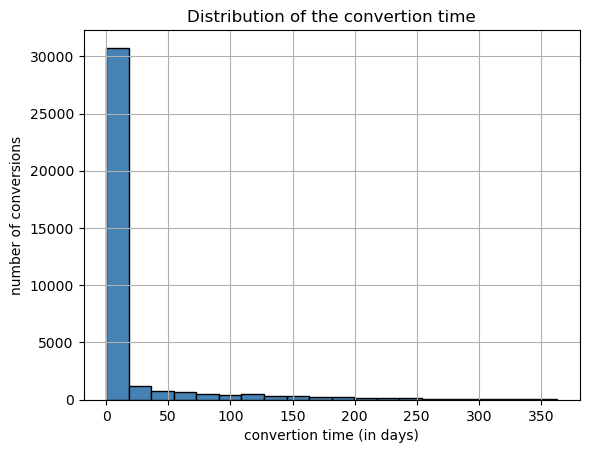

In [108]:
# plotting a histogram to check the distribution of the conversion time
plt.hist(purchases['conversion'], bins=20, color='steelblue', edgecolor='black')
plt.xlabel('convertion time (in days)')
plt.ylabel('number of conversions')
plt.title('Distribution of the convertion time')
plt.grid()
plt.show()

According to the histogram, the conversion isn't evenly distributed. \
Since this is not a normal distribution, the average conversion will be calculated using mode() instead of mean().

In [110]:
conversion = purchases['conversion'].mode()
print('The most common conversion time is:', conversion.item(), 'days.')

The most common conversion time is: 0 days.


Usually it takes 0 days to convert a customer into a buyer.

In [112]:
purchases['conversion'].value_counts().reset_index()

conversion  count
0             0  26362
1             1   1011
2             2    563
3             3    434
4             4    324
..          ...    ...
340         329      1
341         341      1
342         330      1
343         363      1
344         297      1

[345 rows x 2 columns]

In [113]:
purchases['conversion'].describe()

count    36522.000000
mean        16.730327
std         46.959650
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: conversion, dtype: float64

[Back to Contents](#back)

<h4>2.2.1.2. conversion time per marketing channel</h4> <a id='conversion_time'></a>

To explore the conversion time of different marketing channels:
* a table first_visit_source is created with the first time the user came from the ad source,
* the table first_visit_source is merged with the table purchases to add the column with the ad source identifier,
* the data is grouped by the ad source,
* found the total amount of days needed for each marketing channel to convert a client.

In [117]:
first_visit_source = visits.groupby(['uid', 'source_id'])['start_ts'].min().reset_index()
first_visit_source.columns = ['uid', 'source_id', 'first_visit']
first_visit_source.head()

uid  source_id         first_visit
0   11863502262781          3 2018-03-01 17:27:00
1   49537067089222          2 2018-02-06 15:55:00
2  297729379853735          3 2017-06-07 18:47:00
3  313578113262317          2 2017-09-18 22:49:00
4  325320750514679          5 2017-09-30 14:29:00

In [118]:
conversion_ad_source = purchases.merge(first_visit_source, on=['uid', 'first_visit'], how='left')
conversion_ad_source.head()

uid         first_order         first_visit  conversion  \
0   313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00         106   
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00           0   
2  2429014661409475 2017-10-11 18:33:00 2017-10-11 17:14:00           0   
3  2464366381792757 2018-01-28 15:54:00 2018-01-27 20:10:00           0   
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00           0   

   source_id  
0          2  
1         10  
2          3  
3          5  
4          5

In [119]:
# checking if merging did not create duplicated rows 
conversion_ad_source.duplicated().sum()

0

In [120]:
days_per_source = conversion_ad_source.groupby('source_id')['conversion'].sum().reset_index()
days_per_source.columns = ['source_id', 'conversion']
days_per_source

source_id  conversion
0          1       29605
1          2       71732
2          3      182373
3          4      167799
4          5       95566
5          7           0
6          9       48254
7         10       15696

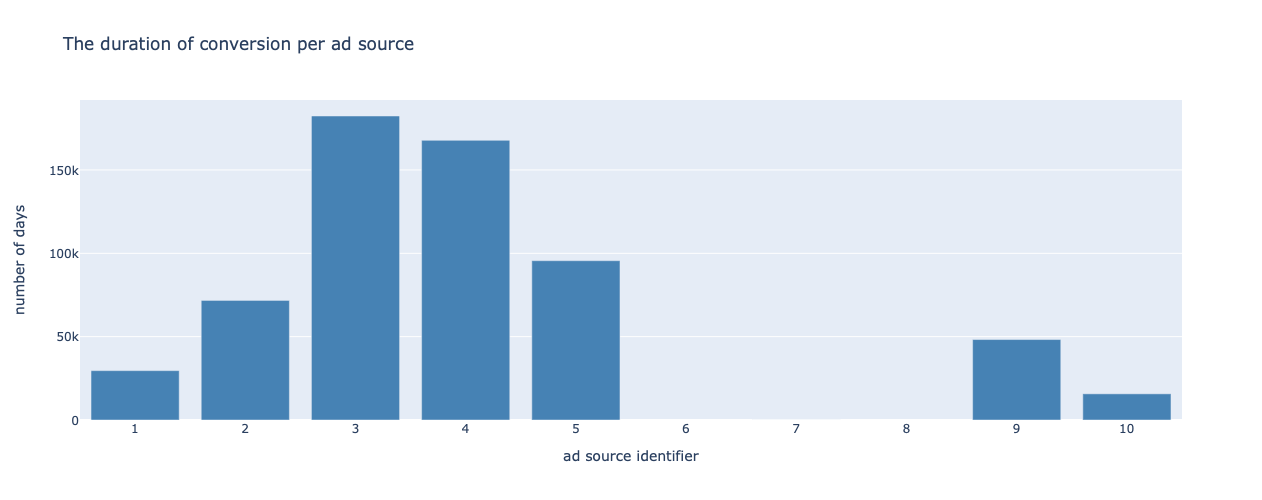

In [121]:
# # plotting a bar chart to show the distribution of the conversion time per ad source
fig_source = px.bar(days_per_source, x='source_id', y='conversion', title='The duration of conversion per ad source', width=1200, height=500)
fig_source.update_layout(xaxis_title = 'ad source identifier', yaxis_title = 'number of days', showlegend=False, xaxis = dict(tickmode = 'linear', dtick = 1))
fig_source.update_traces(marker_color='steelblue')
fig_source.show()

It looks like the marketing channels 3 and 4 take the longest time to convert visitors to buyers. \
But to understand the real conversion time per marketing channel it is necessary to:
* find the total number of ads per marketing channel
* compare the conversion length with the number of ads per each channel to see how long it takes each channel to convert a user.

In [123]:
# checking how often each ad source is represented in the dataframe
ad = conversion_ad_source['source_id'].value_counts().reset_index()
ad.columns = ['source_id', 'number_ads']
ad

source_id  number_ads
0          3       10473
1          4       10295
2          5        6931
3          2        3506
4          1        2899
5         10        1329
6          9        1088
7          7           1

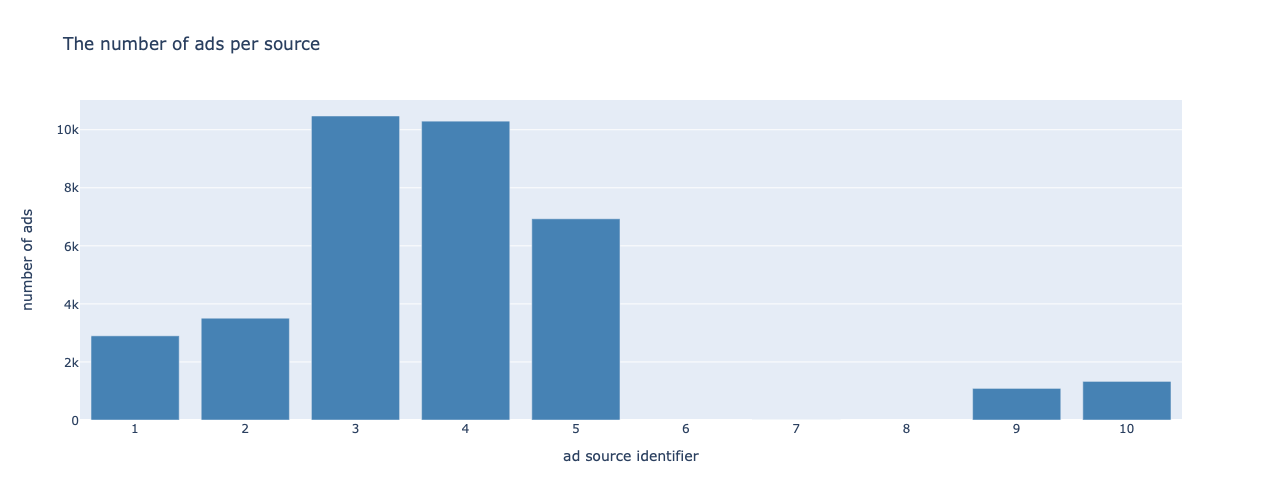

In [124]:
fig_ad = px.bar(ad, x='source_id', y='number_ads',title='The number of ads per source', width=1200, height=500)
fig_ad.update_layout(xaxis_title = 'ad source identifier', yaxis_title = 'number of ads', showlegend=False, xaxis = dict(tickmode = 'linear', dtick = 1))
fig_ad.update_traces(marker_color='steelblue')
fig_ad.show()

In [125]:
conversion_channels = days_per_source.merge(ad, on=['source_id'], how='left')
conversion_channels

source_id  conversion  number_ads
0          1       29605        2899
1          2       71732        3506
2          3      182373       10473
3          4      167799       10295
4          5       95566        6931
5          7           0           1
6          9       48254        1088
7         10       15696        1329

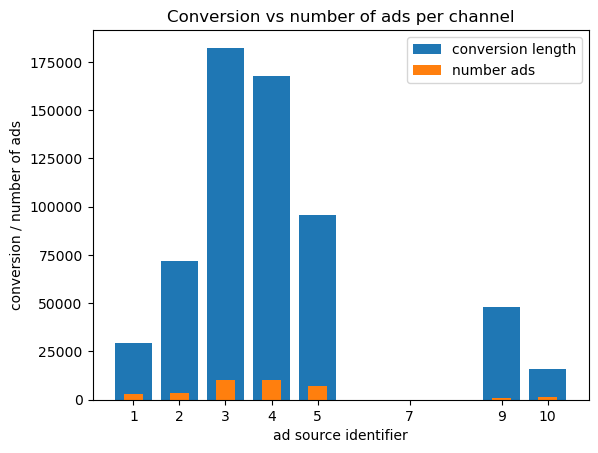

In [126]:
# Create figure
fig = plt.figure()
ax = fig.add_subplot()

# Define multiple bar charts
ax.bar(x=conversion_channels['source_id'], height=conversion_channels['conversion'], width=0.8, align='center', label='conversion length')
ax.bar(x=conversion_channels['source_id'], height=conversion_channels['number_ads'], width=0.8/2, align='center', label='number ads')

# Define x-ticks
plt.xticks(conversion_channels['source_id'].unique())

# Display the plot
plt.xlabel('ad source identifier')
plt.ylabel('conversion / number of ads')
ax.legend(loc="upper right")
plt.title("Conversion vs number of ads per channel")
plt.show()

# ------------------------------------
# 1st alternative way to visualize it:
# import plotly.graph_objects as go
# fig = go.Figure([go.Bar(
#            x=both['source_id'], y=both['conversion'], name="conversion", marker_color="IndianRed"), go.Bar(
#            x=both['source_id'], y=both['count'], name="number of ads", marker_color="LightSalmon")], layout = go.Layout(barmode='overlay'))
# fig.update_layout(title = "Conversion vs Number per Ad Source")
# fig.show()

# 2nd alternative way to visualize it:
# days = days_per_source
# ads = ad
# indices = conversion_ad_source['source_id'].unique()
# width = 0.8
# plt.bar(indices, days, width=width, color='b', label='conversion in days')
# plt.bar([i+0.25*width for i in indices], ads, width=0.5*width, color='r', alpha=0.5, label='number of ads')

In [127]:
conversion_channels['days_per_channel']=conversion_channels['conversion'] / conversion_channels['number_ads']
conversion_channels

source_id  conversion  number_ads  days_per_channel
0          1       29605        2899         10.212142
1          2       71732        3506         20.459783
2          3      182373       10473         17.413635
3          4      167799       10295         16.299077
4          5       95566        6931         13.788198
5          7           0           1          0.000000
6          9       48254        1088         44.351103
7         10       15696        1329         11.810384

In [128]:
print('The number of visitors per ad source 6 is:', visits[visits['source_id']==6]['uid'].count())
print('The number of visitors per ad source 7 is:', visits[visits['source_id']==7]['uid'].count())
print('The number of visitors per ad source 8 is:', visits[visits['source_id']==8]['uid'].count())

The number of visitors per ad source 6 is: 6
The number of visitors per ad source 7 is: 36
The number of visitors per ad source 8 is: 0


[Back to Contents](#back)

<h4>2.2.1.3. conversion rate</h4> <a id='conversion_rate'></a>

The share of people who change their status, e.g. the share of website visitors that become actual buyers. \
conversion rate = buyers / visitors * 100%

In [132]:
# calculating how many customers converted in total
conversion_rate = purchases['uid'].nunique() / visits['uid'].nunique()
print('The overall conversion rate is: {:.1%}'.format(conversion_rate))

The overall conversion rate is: 16.0%


[Back to Contents](#back)

<h4>2.2.1.4. conversion rate per marketing channel</h4> <a id='conversion_channel'></a>

Steps to find the conversion rate of different marketing channels:
* calculate the share of visitors per ad channel
* calculate the share of buyers per ad channel
* merge two tables together and find the conversion rate per ad channel

In [136]:
visitors_per_channel=visits.groupby('source_id')['uid'].nunique().reset_index()
visitors_per_channel.columns = ['source_id', 'number_visitors']
visitors_per_channel

source_id  number_visitors
0          1            18999
1          2            26245
2          3            74756
3          4            83525
4          5            56974
5          6                6
6          7               34
7          9             9264
8         10             8067

In [137]:
buyers_per_channel=conversion_ad_source.groupby('source_id')['uid'].nunique().reset_index()
buyers_per_channel.columns = ['source_id', 'number_buyers']
buyers_per_channel

source_id  number_buyers
0          1           2899
1          2           3506
2          3          10473
3          4          10295
4          5           6931
5          7              1
6          9           1088
7         10           1329

In [138]:
conversion_rate_channel = buyers_per_channel.merge(visitors_per_channel, on=['source_id'], how='left')
conversion_rate_channel

source_id  number_buyers  number_visitors
0          1           2899            18999
1          2           3506            26245
2          3          10473            74756
3          4          10295            83525
4          5           6931            56974
5          7              1               34
6          9           1088             9264
7         10           1329             8067

In [139]:
conversion_rate_channel['conversion_rate_per_channel'] = conversion_rate_channel['number_buyers'] / conversion_rate_channel['number_visitors'] * 100
conversion_rate_channel

source_id  number_buyers  number_visitors  conversion_rate_per_channel
0          1           2899            18999                    15.258698
1          2           3506            26245                    13.358735
2          3          10473            74756                    14.009578
3          4          10295            83525                    12.325651
4          5           6931            56974                    12.165198
5          7              1               34                     2.941176
6          9           1088             9264                    11.744387
7         10           1329             8067                    16.474526

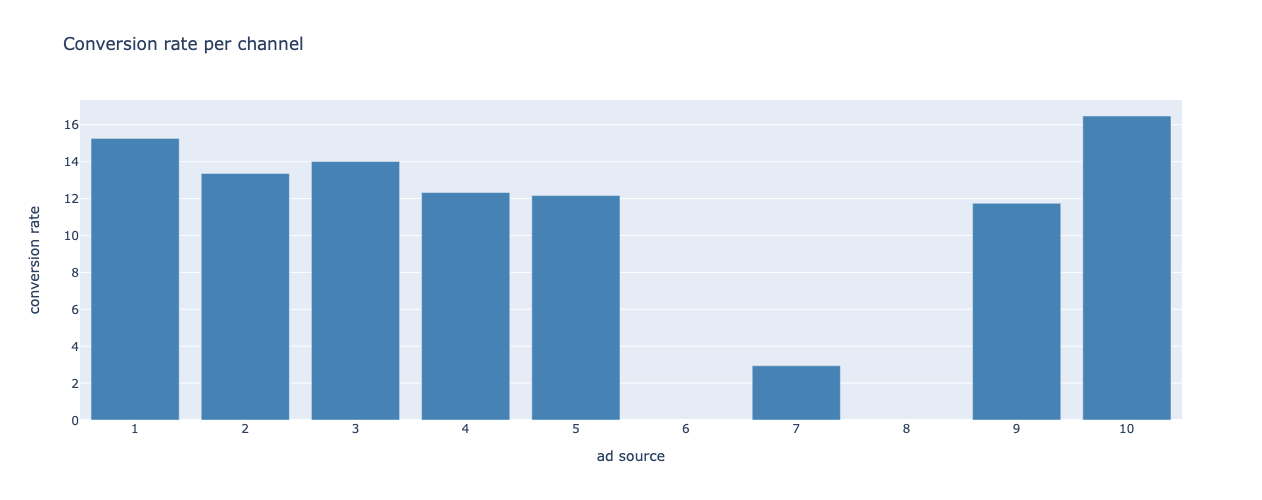

In [140]:
fig_crc = px.bar(conversion_rate_channel, x='source_id', y='conversion_rate_per_channel', title='Conversion rate per channel', width=1200, height=500)
fig_crc.update_layout(xaxis_title = 'ad source', yaxis_title = 'conversion rate', showlegend=False, xaxis = dict(tickmode = 'linear', dtick = 1))
fig_crc.update_traces(marker_color='steelblue')
fig_crc.show()

<h3>Conclusions</h3> <a id='conclusions_8'></a>

* __Conversion:__
    * Most commonly it takes 0 days to convert a customer into a buyer from his first visit until the purchase.
    * 75% of customers are converted within 2 days.

* __Conversion time of marketing channels:__
    * At first glance, it takes marketing channels 3 and 4 the longest to convert customers.
    * But further exploration of the data showed that:
        * The total convertion time strongly correlates with the number of ads per channel.
        * The marketing channel 9 requires the longest time to convert customers into buyers, followed by channels 2 and 4.
        * The marketing channels 1 and 10 take the least time to convert customers into buyers.
        * The marketing channels 6 and 8 do not lead to customer conversion at all.
        * The marketing channel 7 led to only 1 conversion.
        * Moreover, the channels 6, 7, 8 are not represented in the table expenses at all and poorly represented in the table visits: \
          the number of visitors per ad source 7 is 36, for ad source 6 it is only 6 and 0 visitors per ad channel 8. \
          It can be that these channels are new and are just beginning to be implemented by the marketing department, so there is almost no data on them yet.

* __Conversion rate:__
    * Overall, 16% of users are converted into buyers.

* __Conversion rate per marketing channel:__
    * The ad source 10 shows the best conversion rate, followed by channels 1, 3 and 2. 
    * The channel 9 has the lowest conversion rate.
    * The ad source 7 is not taken into account since there is not enough data for it.

[Back to Contents](#back)

<h3>2.2.2. number of orders</h3> <a id='number_orders'></a>

How many orders do customers make during a given period of time?

Steps:
* find the date of the first order for each customer
* form cohorts by month
* find the lifetime for each order within the cohort
* find the number of customers per cohort (per first order month)
* find the number of orders per cohort (first order month) and lifetime (all subsequent months)
* find the number of orders per customer per cohort and lifetime
* find the cumulative number of orders per customer at each lifetime for each cohort

In [145]:
# creating a separate column for the month of the purchase
orders['order_month'] = orders['buy_ts'].values.astype('datetime64[M]')

In [146]:
# finding the date of the first order for each customer
orders['first_order'] = orders.groupby(['uid'])['buy_ts'].transform('min')

In [147]:
# defining cohort month through the first purchase
orders['first_order_month'] = orders['first_order'].values.astype('datetime64[M]')

In [148]:
# finding the lifetime in months for each order within the cohort
orders['lifetime'] = (orders['order_month'].values.astype('datetime64[M]') - orders['first_order_month'].values.astype('datetime64[M]')).astype(int)
orders.head()

buy_ts  revenue                   uid order_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01   

          first_order first_order_month  lifetime  
0 2017-06-01 00:10:00        2017-06-01         0  
1 2017-06-01 00:25:00        2017-06-01         0  
2 2017-06-01 00:27:00        2017-06-01         0  
3 2017-06-01 00:29:00        2017-06-01         0  
4 2017-06-01 07:58:00        2017-06-01         0

In [149]:
# calculating the number of customers per each cohort (cohort size)
cohort_customers = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_customers.columns=['first_order_month','cohort_size']
cohort_customers

first_order_month  cohort_size
0         2017-06-01         2023
1         2017-07-01         1923
2         2017-08-01         1370
3         2017-09-01         2581
4         2017-10-01         4340
5         2017-11-01         4081
6         2017-12-01         4383
7         2018-01-01         3373
8         2018-02-01         3651
9         2018-03-01         3533
10        2018-04-01         2276
11        2018-05-01         2988

In [150]:
# calculating the number of orders per cohort and lifetime
cohort_orders = orders.groupby(['first_order_month','lifetime'])['revenue'].count().reset_index()
cohort_orders.columns = ['first_order_month','lifetime','number_orders']
cohort_orders

first_order_month  lifetime  number_orders
0         2017-06-01         0           2354
1         2017-06-01         1            177
2         2017-06-01         2            174
3         2017-06-01         3            226
4         2017-06-01         4            292
..               ...       ...            ...
73        2018-03-01         1            178
74        2018-03-01         2            176
75        2018-04-01         0           2495
76        2018-04-01         1            195
77        2018-05-01         0           3249

[78 rows x 3 columns]

In [151]:
# calculating the number of orders per customer per cohort and lifeitme
orders_per_buyer = cohort_orders.merge(cohort_customers, on=['first_order_month'], how='left')
orders_per_buyer['orders_per_buyer'] = orders_per_buyer['number_orders'] / orders_per_buyer['cohort_size']
orders_per_buyer.head()

first_order_month  lifetime  number_orders  cohort_size  orders_per_buyer
0        2017-06-01         0           2354         2023          1.163618
1        2017-06-01         1            177         2023          0.087494
2        2017-06-01         2            174         2023          0.086011
3        2017-06-01         3            226         2023          0.111715
4        2017-06-01         4            292         2023          0.144340

In [152]:
# creating a pivot table to do cohort analysis on the number of orders per customer
cohort_pivot=orders_per_buyer.pivot_table(index='first_order_month', columns='lifetime', values='orders_per_buyer', aggfunc='sum')
cohort_pivot.round(2).fillna('')

lifetime             0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         1.16  0.09  0.09  0.11  0.14  0.11  0.14  0.09   0.1  0.08   
2017-07-01         1.14  0.05  0.06  0.05  0.04  0.04  0.03  0.03  0.03  0.01   
2017-08-01         1.12  0.08  0.07  0.06  0.06  0.05  0.04  0.06  0.03  0.03   
2017-09-01         1.14  0.08  0.06  0.06  0.03  0.04  0.04  0.02  0.02         
2017-10-01         1.14  0.07  0.04  0.03  0.03  0.02  0.02  0.03               
2017-11-01         1.18   0.1  0.04  0.05  0.03  0.01  0.02                     
2017-12-01         1.15  0.06  0.05  0.04  0.02  0.02                           
2018-01-01         1.12  0.07  0.05  0.02  0.02                                 
2018-02-01         1.12  0.06  0.02  0.02                                       
2018-03-01         1.17  0.05  0.05                                             
2018-04-01         1.10  0.09                                                   
2018-05-01         1.09                                                         

lifetime             10    11  
first_order_month              
2017-06-01         0.05  0.04  
2017-07-01         0.03        
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01

In [153]:
# using cumsum on a pivot table
# to see how many orders customers made up to a certain lifetime month (and not in a certain month)
# for easier comparison of cohort behavior
cohort_pivot=orders_per_buyer.pivot_table(index='first_order_month', columns='lifetime', values='orders_per_buyer', aggfunc='sum').cumsum(axis=1)
cohort_pivot.round(2).fillna('')

lifetime             0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         1.16  1.25  1.34  1.45  1.59   1.7  1.84  1.92  2.03   2.1   
2017-07-01         1.14  1.19  1.25  1.31  1.34  1.39  1.42  1.44  1.47  1.49   
2017-08-01         1.12   1.2  1.27  1.33  1.39  1.44  1.47  1.53  1.56   1.6   
2017-09-01         1.14  1.22  1.28  1.35  1.37  1.42  1.46  1.48   1.5         
2017-10-01         1.14  1.22  1.25  1.28  1.31  1.34  1.35  1.38               
2017-11-01         1.18  1.28  1.32  1.37  1.41  1.42  1.45                     
2017-12-01         1.15  1.21  1.26   1.3  1.32  1.34                           
2018-01-01         1.12  1.19  1.24  1.25  1.28                                 
2018-02-01         1.12  1.18  1.21  1.22                                       
2018-03-01         1.17  1.22  1.27                                             
2018-04-01         1.10  1.18                                                   
2018-05-01         1.09                                                         

lifetime             10    11  
first_order_month              
2017-06-01         2.15  2.19  
2017-07-01         1.51        
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01

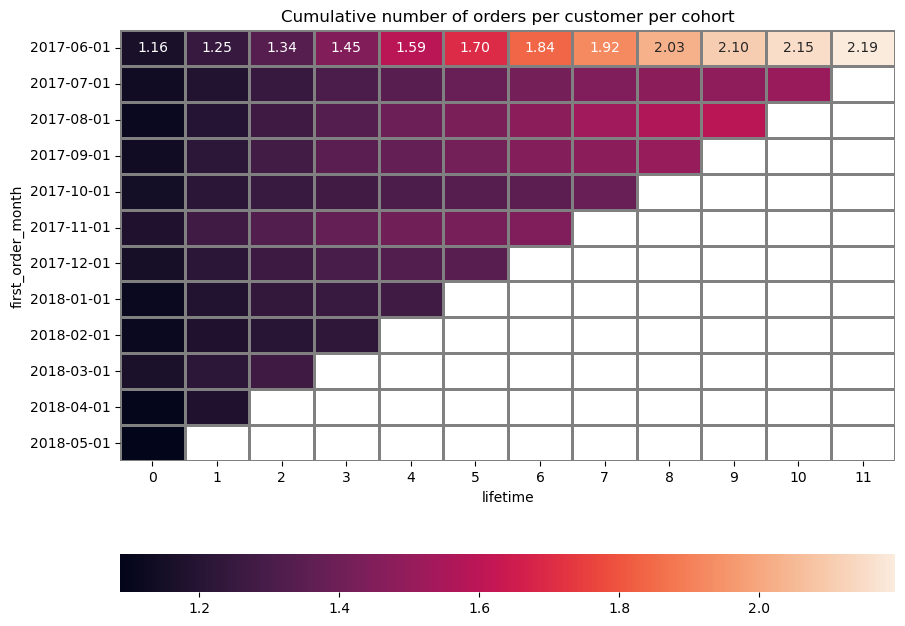

In [154]:
# visualizing the cumulative number of orders per customer per cohort using heatmap
cohort_pivot.index = cohort_pivot.index.astype(str)
plt.figure(figsize=(10, 8))
sns.heatmap(cohort_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'}).set(title ='Cumulative number of orders per customer per cohort')
plt.show()

<h3>Conclusions</h3> <a id='conclusions_9'></a>

* To find how many orders customers make during a given period of time, the cohort analysis was used:
    * a cohort was defined by the month of the first order,
    * the data was aggregated for each cohort: the lifetime for each order, the number of orders and unique customers,
    * the number of orders per customer was calculated for each cohort and each month.


* At the 0th lifetime, the average amount of orders per customer is 1.

* After the 0th lifetime, the number of orders drops significantly for each cohort for all subsequent months.

* June, November and March cohorts have the highest amount of orders at the 0th lifetime.

* June cohort has also the highest number of orders during all lifetimes.

* Cumulatively, all summer months, September and November cohorts make 1.5-2 orders per user by the end of their lifetime, with June cohort having the leading position with 2.19 orders per customer.

[Back to Contents](#back)

<h3>2.2.3. average purchase size</h3> <a id='purchase_size'></a>

What is the average purchase size?

<h4>2.2.3.1. overall average check</h4> <a id='average_check'></a>

In [159]:
orders.head()

buy_ts  revenue                   uid order_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01   

          first_order first_order_month  lifetime  
0 2017-06-01 00:10:00        2017-06-01         0  
1 2017-06-01 00:25:00        2017-06-01         0  
2 2017-06-01 00:27:00        2017-06-01         0  
3 2017-06-01 00:29:00        2017-06-01         0  
4 2017-06-01 07:58:00        2017-06-01         0

In [160]:
# checking the distribution of the revenue values
orders['revenue'].describe()

count    50414.000000
mean         4.999678
std         21.818574
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

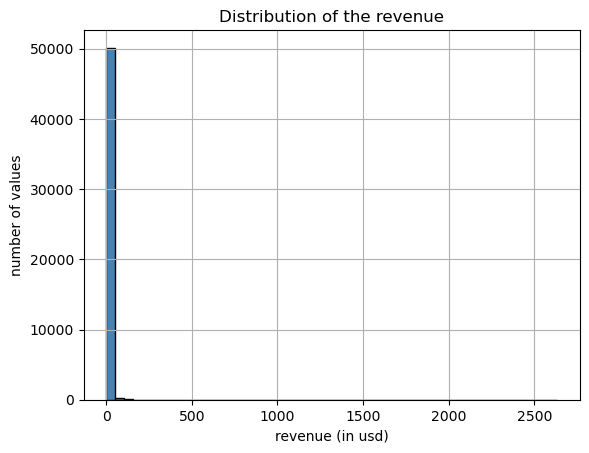

In [161]:
# plotting the distribution of the revenue values
plt.hist(orders['revenue'], bins=50, color='steelblue', edgecolor='black')
plt.xlabel('revenue (in usd)')
plt.ylabel('number of values')
plt.title('Distribution of the revenue')
plt.grid()
plt.show()

According to the histogram, the revenue isn't evenly distributed. \
Since this is not a normal distribution, the average revenue will be calculated using median() instead of mean().

In [163]:
# calculating the overall average purchase size
orders['revenue'].median()

2.5

[Back to Contents](#back)

<h4>2.2.3.2. average check per customer</h4> <a id='customer_check'></a>

In [166]:
# calculating the average purchase size per customer
avg_check = orders.groupby(['uid'])['revenue'].mean().reset_index()
avg_check.columns = ['uid', 'average_check']
avg_check.head()

uid  average_check
0   313578113262317          0.550
1  1575281904278712          1.525
2  2429014661409475         73.330
3  2464366381792757          2.440
4  2551852515556206          5.495

In [167]:
# checking the distribution of the average check values
avg_check['average_check'].describe()

count    36522.000000
mean         4.093111
std          7.671324
min          0.000000
25%          1.285000
50%          2.490000
75%          4.890000
max        657.466250
Name: average_check, dtype: float64

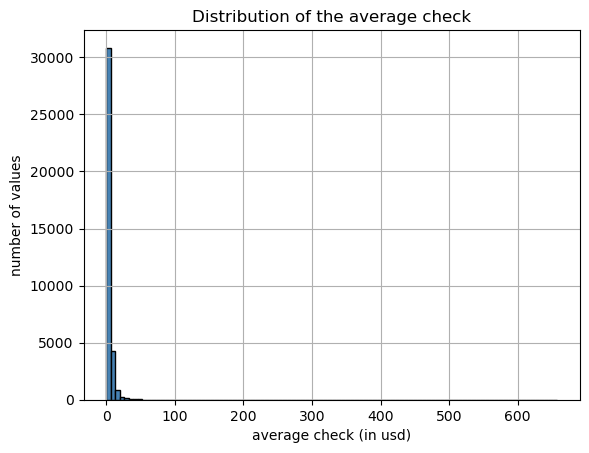

In [168]:
# plotting the distribution of the average check
plt.hist(avg_check['average_check'], bins=100, color='steelblue', edgecolor='black')
plt.xlabel('average check (in usd)')
plt.ylabel('number of values')
plt.title('Distribution of the average check')
plt.grid()
plt.show()

In [169]:
# calculating the overall average purchase size per customer
avg_check['average_check'].median()

2.49

[Back to Contents](#back)

<h4>2.2.3.3. average check per month</h4> <a id='month_check'></a>

In [172]:
# calculating the average purchase size per month
check_per_month = orders.groupby(['order_month'])['revenue'].mean().reset_index()
check_per_month.columns = ['order_month', 'average_check']
check_per_month

order_month  average_check
0   2017-06-01       4.060106
1   2017-07-01       5.306589
2   2017-08-01       4.847139
3   2017-09-01       5.416448
4   2017-10-01       4.928280
5   2017-11-01       4.783518
6   2017-12-01       5.852139
7   2018-01-01       4.112927
8   2018-02-01       4.840095
9   2018-03-01       5.413930
10  2018-04-01       5.150645
11  2018-05-01       4.771279

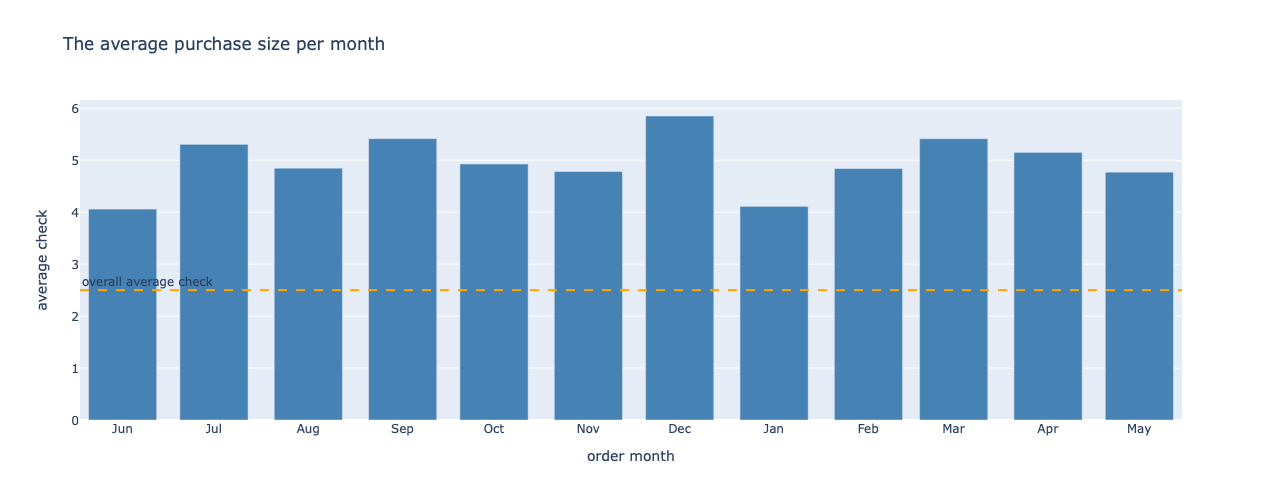

In [173]:
# plotting how the average check was changing over time (per month)
fig_av_check = px.bar(check_per_month, x='order_month', y='average_check', title='The average purchase size per month', width=1200, height=500)
fig_av_check.update_layout(xaxis_title = 'order month', yaxis_title = 'average check', showlegend=False)
# setting 1 tick per month (setting xaxis.tickvals to an array of the exact dates where the tick marks should appear)
fig_av_check.layout.xaxis.tickvals = pd.date_range('2017-06', '2018-06', freq='MS')
# setting the abbreviated month name for each x axis tick
fig_av_check.layout.xaxis.tickformat = '%b'
#adding reference line with the overall average check
fig_av_check.add_hline(y=orders['revenue'].median(),line_dash="dash", line_color="orange", annotation_text="overall average check", annotation_position="top left")
fig_av_check.update_traces(marker_color='steelblue')
fig_av_check.show()

[Back to Contents](#back)

<h4>2.2.3.4. cohort analysis on the average check per month</h4> <a id='cohort_month_check'></a>

In [176]:
# calculating the average purchase size per cohort and lifeitme
avg_cohort = orders.groupby(['first_order_month','lifetime'])['revenue'].mean().reset_index()
avg_cohort.columns = ['first_order_month', 'lifetime', 'revenue']
avg_cohort.head()

first_order_month  lifetime   revenue
0        2017-06-01         0  4.060106
1        2017-06-01         1  5.547006
2        2017-06-01         2  5.088161
3        2017-06-01         3  8.545575
4        2017-06-01         4  7.084178

In [177]:
# creating a pivot table to perform cohort analysis on the average check per month
avg_cohort_pivot = avg_cohort.pivot_table(index='first_order_month', columns='lifetime', values='revenue', aggfunc='mean')
avg_cohort_pivot.round(2).fillna('')

lifetime             0      1      2      3      4      5      6      7   \
first_order_month                                                          
2017-06-01         4.06   5.55   5.09   8.55   7.08   6.83   6.97   6.76   
2017-07-01         5.29   6.45   9.99   6.64   4.72   3.66   3.79   5.45   
2017-08-01         4.72   5.99   6.28   6.62   7.96   6.27   5.89   7.11   
2017-09-01         4.97  13.17   8.35  62.57  15.43  15.32  16.77  11.21   
2017-10-01         4.37   7.41   5.13   5.59    5.1   5.07   4.28   4.01   
2017-11-01         4.37    4.1   4.47   6.28   4.44   3.73    4.6          
2017-12-01         4.11   4.23  20.07  26.08  15.95  14.11                 
2018-01-01         3.69   4.44   6.45   7.52   2.71                        
2018-02-01         3.71   4.58   3.45   3.87                               
2018-03-01         4.14   5.97   6.33                                      
2018-04-01         4.25    6.2                                             
2018-05-01         4.29                                                    

lifetime             8      9      10    11  
first_order_month                            
2017-06-01         5.28   8.01  12.04  6.04  
2017-07-01         5.35  11.79   5.65        
2017-08-01          8.7    5.6               
2017-09-01         7.79                      
2017-10-01                                   
2017-11-01                                   
2017-12-01                                   
2018-01-01                                   
2018-02-01                                   
2018-03-01                                   
2018-04-01                                   
2018-05-01

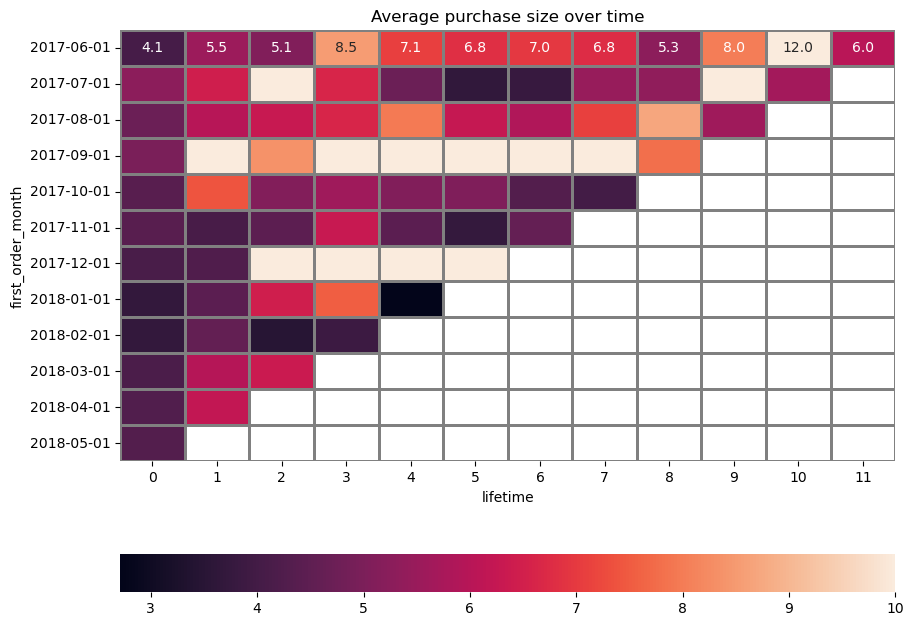

In [178]:
# using heatmap to visualize the average purchase size per lifetime
plt.figure(figsize=(10, 8))
plt.title('Average purchase size over time')
avg_cohort_pivot.index=avg_cohort_pivot.index.astype(str)
sns.heatmap(avg_cohort_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='grey', vmax=10, cbar_kws= {'orientation': 'horizontal'})
plt.show()

<h3>Conclusions</h3> <a id='conclusions_10'></a>

* The overall average purchase size is 2.5.

* The average purchase size per customer is also 2.5.

* The  average purchase size per month stays above the overall average check for all months.

* There seems to be no seasonal effect on the average check per month.

* The highest average check is in December, the lowest – in June 2017 and June 2018.

* The cohort analysis shows changes in the average purchase size by cohorts grouped by lifetime:
    * The average check increases in the 1st month after the 1st purchase for all cohorts, but by the 4th lifetime month it starts to decrease.
    * September and December cohorts have high average check values during all their lifetime.
    * October, November and February cohorts spend approximately the same amount of money each month as in the beginning.
    * The general trend: customers start spending more money over time.

[Back to Contents](#back)

<h3>2.2.4. LTV</h3> <a id='LTV'></a>

How much money do customers bring? (LTV)

Steps to calculate LTV:
* Find the number of unique users in each cohort:
    * retrieve the month of each customer's first purchase \
      done in step 2.2.2. number of orders: \
      orders['first_order_month'] = orders['first_order'].values.astype('datetime64[M]')
    * calculate the number of new buyers for each month (cohort size) \
      done in step 2.2.2. number of orders: \
      cohort_customers = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
* Create a cohort report:
    * group the orders into cohorts by month of first purchase and month of purchase and sum up the revenue
    * merge these cohorts with cohort sizes to add data on how many customers made their first purchases in each month
* Calculate LTV:
    * calculate gross profit: gp = revenue * margin rate \
      __assumption__: for this project the margin rate=1, so gp (gross profit) = revenue.
    * find the age of each cohort in months \
      done in step 2.2.2. number of orders: \
      orders['lifetime'] = (orders['order_month'].values.astype('datetime64[M]') - orders['first_order_month'].values.astype('datetime64[M]')).astype(int)
    * calculate LTV for cohorts \
      LTV = revenue per lifetime / cohort size
* Visualize the cohorts as a pivot table and as a heatmap

In [183]:
# getting the revenue per cohort in each month
ltv_cohort = orders.groupby(['first_order_month','lifetime'])['revenue'].sum().reset_index()
ltv_cohort

first_order_month  lifetime   revenue
0         2017-06-01         0   9557.49
1         2017-06-01         1    981.82
2         2017-06-01         2    885.34
3         2017-06-01         3   1931.30
4         2017-06-01         4   2068.58
..               ...       ...       ...
73        2018-03-01         1   1063.05
74        2018-03-01         2   1114.87
75        2018-04-01         0  10600.69
76        2018-04-01         1   1209.92
77        2018-05-01         0  13925.76

[78 rows x 3 columns]

In [184]:
# merging with the cohort size
ltv = ltv_cohort.merge(cohort_customers, on=['first_order_month'], how='left')
ltv

first_order_month  lifetime   revenue  cohort_size
0         2017-06-01         0   9557.49         2023
1         2017-06-01         1    981.82         2023
2         2017-06-01         2    885.34         2023
3         2017-06-01         3   1931.30         2023
4         2017-06-01         4   2068.58         2023
..               ...       ...       ...          ...
73        2018-03-01         1   1063.05         3533
74        2018-03-01         2   1114.87         3533
75        2018-04-01         0  10600.69         2276
76        2018-04-01         1   1209.92         2276
77        2018-05-01         0  13925.76         2988

[78 rows x 4 columns]

In [185]:
# calculating ltv
ltv['ltv'] = ltv['revenue'] / ltv['cohort_size']
ltv

first_order_month  lifetime   revenue  cohort_size       ltv
0         2017-06-01         0   9557.49         2023  4.724414
1         2017-06-01         1    981.82         2023  0.485329
2         2017-06-01         2    885.34         2023  0.437637
3         2017-06-01         3   1931.30         2023  0.954671
4         2017-06-01         4   2068.58         2023  1.022531
..               ...       ...       ...          ...       ...
73        2018-03-01         1   1063.05         3533  0.300892
74        2018-03-01         2   1114.87         3533  0.315559
75        2018-04-01         0  10600.69         2276  4.657597
76        2018-04-01         1   1209.92         2276  0.531599
77        2018-05-01         0  13925.76         2988  4.660562

[78 rows x 5 columns]

In [186]:
# creating a pivot table with ltv
# cumsum() is applied to the pivot table since ltv is a cumulative metric
ltv_pivot = ltv.pivot_table(index='first_order_month', columns='lifetime', values='ltv', aggfunc='sum').cumsum(axis=1)
ltv_pivot.round(2).fillna('')

lifetime             0     1     2      3      4      5      6      7      8   \
first_order_month                                                               
2017-06-01         4.72  5.21  5.65    6.6   7.62   8.36   9.31   9.89  10.45   
2017-07-01         6.01  6.35  6.97   7.33    7.5   7.66   7.78   7.92   8.08   
2017-08-01         5.28  5.75  6.21    6.6   7.09   7.38   7.59   7.99   8.28   
2017-09-01         5.64  6.76  7.28  11.26  11.66  12.31  13.01  13.25  13.44   
2017-10-01         5.00  5.54  5.73   5.89   6.04   6.16   6.24   6.36          
2017-11-01         5.15  5.55  5.75   6.08   6.23   6.28    6.4                 
2017-12-01         4.74   5.0  5.92   6.99    7.3   7.64                        
2018-01-01         4.14  4.43  4.73   4.88   4.94                               
2018-02-01         4.16  4.44  4.51   4.59                                      
2018-03-01         4.84  5.14  5.46                                             
2018-04-01         4.66  5.19                                                   
2018-05-01         4.66                                                         

lifetime              9      10     11  
first_order_month                       
2017-06-01         11.05  11.62  11.88  
2017-07-01          8.23   8.39         
2017-08-01          8.47                
2017-09-01                              
2017-10-01                              
2017-11-01                              
2017-12-01                              
2018-01-01                              
2018-02-01                              
2018-03-01                              
2018-04-01                              
2018-05-01

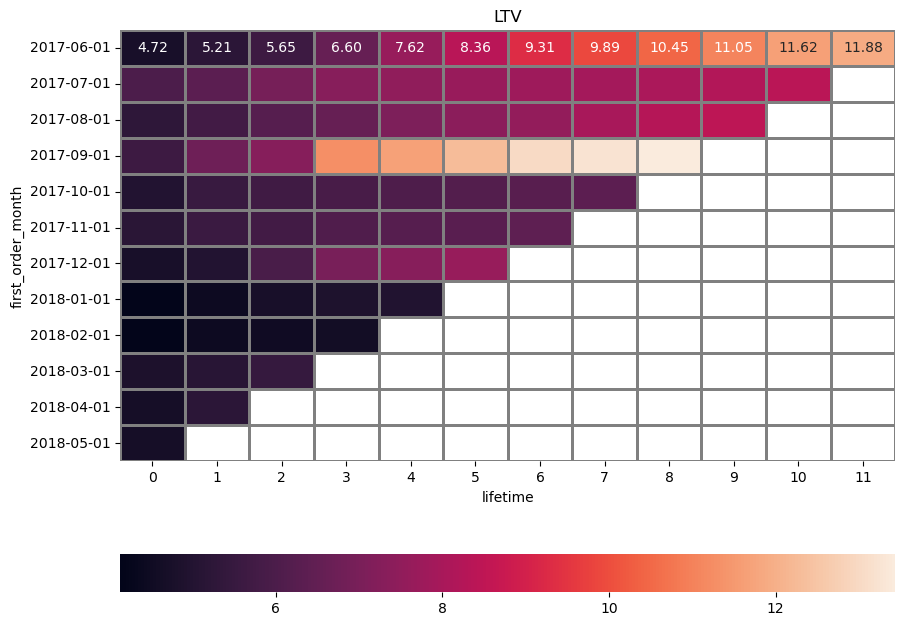

In [187]:
# visualizing ltv using heatmap
ltv_pivot.index=ltv_pivot.index.astype(str)
plt.figure(figsize=(10, 8))
sns.heatmap(ltv_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'}).set(title ='LTV')
plt.show()

<h3>Conclusions</h3> <a id='conclusions_11'></a>

* For LTV calculations, the assumption is made that margin rate=1.

* LTV is calculated as the total amount of money each customer brings per lifetime.

* In the 0th lifetime month, the customers from July and September cohorts have the highest lifetime value, \
  while the customers from January and February have the lowest LTV.

* On average a customer from a July cohort brings back 6.01 usd in his 0th lifetime month, while a customer from a January cohort brings back 4.14 usd.

* All winter (except for December) and spring cohorts have lower LTV compared to summer and autumn cohorts.

* After 6 months the September cohort has the best cumulative LTV.

* By the end of the lifetime, the September and June cohorts have the highest cumulative LTV.

[Back to Contents](#back)

<h2>Sales summary</h2> <a id='summary_3'></a>

1. On average, a website visitor makes a purchase on the same day (conversion 0d).
2. 75% of visitors are converted into buyers within 2 days.
3. Overall, 16% of users are converted into buyers.
4. Conversion time correlates with the number of ads per channel.
5. Source 9 requires the longest time to convert customers into buyers, and has the lowest conversion rate.
6. Sources 1 and 10 take the least time to convert visitors into buyers, and have the highest conversion rate.
7. Sources 6, 7 and 8 are not taken into account due to lack of data for them.
8. A customer makes on average 1 order in his 0th lifetime month.
9. After the 0th lifetime, the number of orders drops significantly for each cohort for all subsequent months.
10. June cohort has the highest number of orders during all lifetimes.
11. Cumulatively, all summer months, September and November cohorts make 1.5-2 orders per user by the end of their lifetime.
12. The average purchase size per customer and overall is 2.5 usd.
13. There is no seasonal effect on the average check per month.
14. Overall, customers start spending more money over time.
15. September and December cohorts have high average check during all their lifetime.
16. For LTV calculations, the assumption is made that margin rate=1.
17. In the 0th lifetime month:
    * July and September cohorts have the highest lifetime value (6.01 and 5.64)
    * January and February cohorts have the lowest LTV (4.14 and 4.16)
18. All winter (except for December) and spring cohorts have lower LTV compared to summer and autumn cohorts.
19. September and June cohorts have the highest cumulative LTV by the end of the lifetime.

[Back to Contents](#back)

<h2>2.3. Marketing</h2> <a id='marketing'></a>

<h3>2.3.1. money spent per source</h3> <a id='money_spent'></a>

How much money was spent? Overall, per source and over time.

<h4>2.3.1.1. overall marketing costs</h4> <a id='marketing_cost'></a>

In [194]:
# overall marketing cost
total_cost = expenses['costs'].sum()
print('Total marketing cost is:', total_cost)

Total marketing cost is: 329131.62


<h4>2.3.1.2. marketing costs per source</h4> <a id='marketing_source'></a>

In [196]:
# marketing costs per source
source_cost = expenses.groupby('source_id')['costs'].sum().reset_index()
source_cost['%_total'] = (source_cost['costs'] / total_cost * 100).round()
source_cost.sort_values(by='costs', ascending=False)

source_id      costs  %_total
2          3  141321.63     43.0
3          4   61073.60     19.0
4          5   51757.10     16.0
1          2   42806.04     13.0
0          1   20833.27      6.0
6         10    5822.49      2.0
5          9    5517.49      2.0

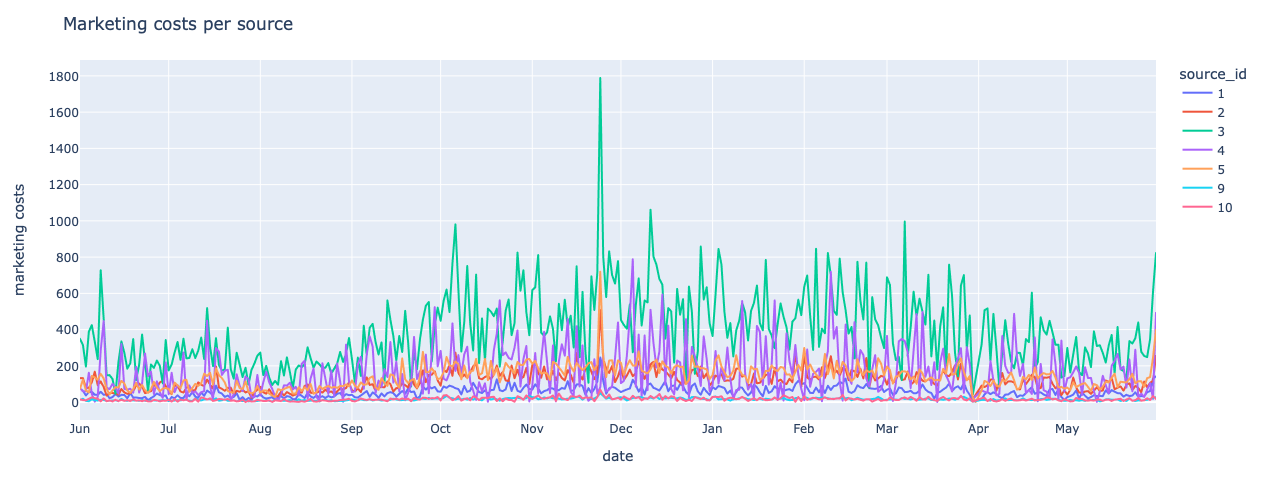

In [197]:
# marketing costs over time per source
fig_cts = px.line(expenses, x='dt', y='costs', color='source_id', width=1200, height=500)
fig_cts.update_layout(xaxis_title = 'date', yaxis_title = 'marketing costs',  title='Marketing costs per source')
fig_cts.update_layout(xaxis = dict(tickmode = 'array', tickvals = check_per_month['order_month']))
fig_cts.layout.xaxis.tickformat = '%b'
fig_cts.show()

[Back to Contents](#back)

<h4>2.3.1.3. marketing costs per month</h4> <a id='marketing_month'></a>

In [200]:
# adding month of the marketing expenses
expenses['month'] = expenses['dt'].values.astype('datetime64[M]')

In [201]:
# marketing costs per month
cost_per_month = expenses.groupby('month')['costs'].sum().reset_index()
cost_per_month['%_total'] = (cost_per_month['costs'] / total_cost * 100).round()
cost_per_month

month     costs  %_total
0  2017-06-01  18015.00      5.0
1  2017-07-01  18240.59      6.0
2  2017-08-01  14790.54      4.0
3  2017-09-01  24368.91      7.0
4  2017-10-01  36322.88     11.0
5  2017-11-01  37907.88     12.0
6  2017-12-01  38315.35     12.0
7  2018-01-01  33518.52     10.0
8  2018-02-01  32723.03     10.0
9  2018-03-01  30415.27      9.0
10 2018-04-01  22289.38      7.0
11 2018-05-01  22224.27      7.0

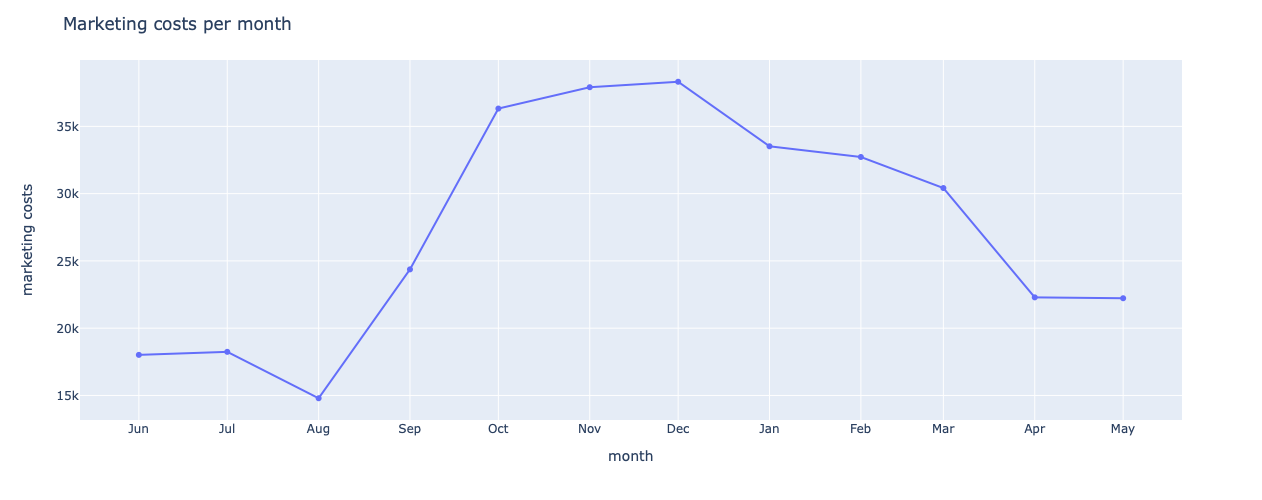

In [202]:
# plotting marketing costs per month
# in general, the bar chart would be better for this purpose, but
# here the line chart is used because it will be better for later comparison with other metrics.
fig_cm = px.line(cost_per_month, x='month', y='costs', width=1200, height=500)
fig_cm.update_traces(mode='markers+lines')
fig_cm.update_layout(xaxis_title = 'month', yaxis_title = 'marketing costs',  title='Marketing costs per month')
fig_cm.update_layout(xaxis = dict(tickmode = 'array', tickvals = cost_per_month['month']))
fig_cm.layout.xaxis.tickformat = '%b'
fig_cm.show()

[Back to Contents](#back)

<h4>2.3.1.4. marketing costs per month and source</h4> <a id='marketing_month_source'></a>

In [205]:
# marketing costs per month and source
cost_month_source = expenses.groupby(['month', 'source_id'])['costs'].sum().reset_index()
cost_month_source

month  source_id    costs
0  2017-06-01          1  1125.61
1  2017-06-01          2  2427.38
2  2017-06-01          3  7731.65
3  2017-06-01          4  3514.80
4  2017-06-01          5  2616.12
..        ...        ...      ...
79 2018-05-01          3  9411.42
80 2018-05-01          4  4214.21
81 2018-05-01          5  3669.56
82 2018-05-01          9   362.17
83 2018-05-01         10   409.86

[84 rows x 3 columns]

In [206]:
costs_pivot = cost_month_source.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum').round()
costs_pivot

source_id       1       2        3       4       5      9      10
month                                                            
2017-06-01  1126.0  2427.0   7732.0  3515.0  2616.0  285.0  314.0
2017-07-01  1073.0  2333.0   7674.0  3530.0  2998.0  303.0  330.0
2017-08-01   952.0  1811.0   6144.0  3217.0  2185.0  249.0  233.0
2017-09-01  1502.0  2986.0   9964.0  5192.0  3849.0  416.0  461.0
2017-10-01  2316.0  4845.0  15737.0  6421.0  5767.0  609.0  627.0
2017-11-01  2445.0  5248.0  17025.0  5389.0  6325.0  683.0  792.0
2017-12-01  2341.0  4898.0  16220.0  7680.0  5873.0  658.0  646.0
2018-01-01  2186.0  4158.0  14809.0  5833.0  5372.0  547.0  614.0
2018-02-01  2204.0  4474.0  14229.0  5712.0  5071.0  552.0  481.0
2018-03-01  1893.0  3943.0  13081.0  5962.0  4530.0  480.0  526.0
2018-04-01  1327.0  2994.0   9297.0  4408.0  3501.0  373.0  388.0
2018-05-01  1468.0  2689.0   9411.0  4214.0  3670.0  362.0  410.0

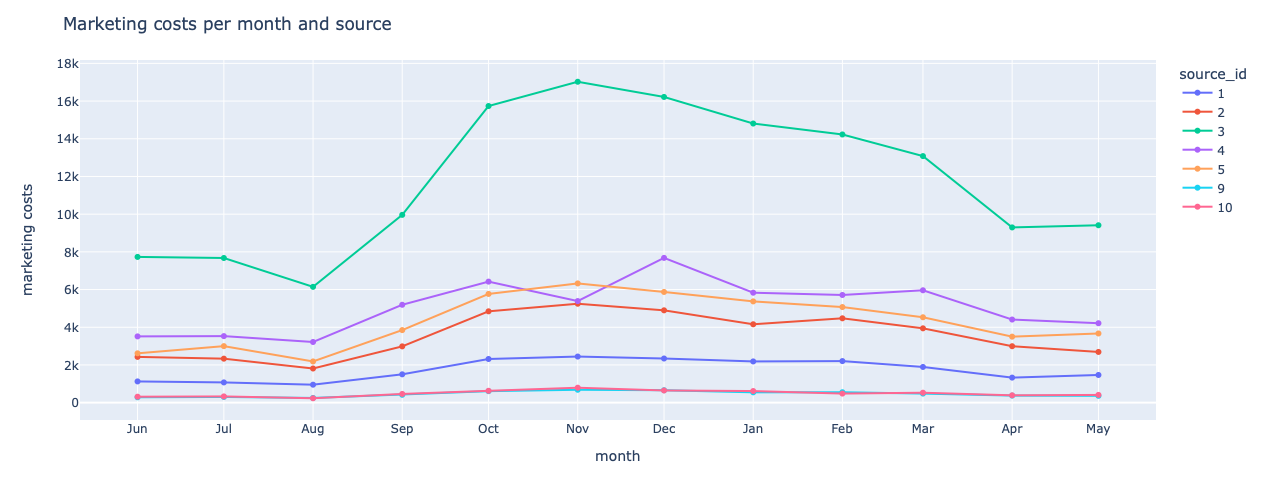

In [207]:
# plotting marketing costs per month and source
fig_cms = px.line(cost_month_source, x='month', y='costs', color='source_id', width=1200, height=500)
fig_cms.update_traces(mode='markers+lines')
fig_cms.update_layout(xaxis_title = 'month', yaxis_title = 'marketing costs',  title='Marketing costs per month and source')
fig_cms.update_layout(xaxis = dict(tickmode = 'array', tickvals = cost_month_source['month']))
fig_cms.layout.xaxis.tickformat = '%b'
fig_cms.show()

[Back to Contents](#back)

<h4>2.3.1.5. marketing costs vs MAU vs revenue per month</h4> <a id='marketing_comparison'></a>

In [210]:
# calculating total revenue per month
revenue_per_month = orders.groupby('order_month')['revenue'].sum().reset_index()

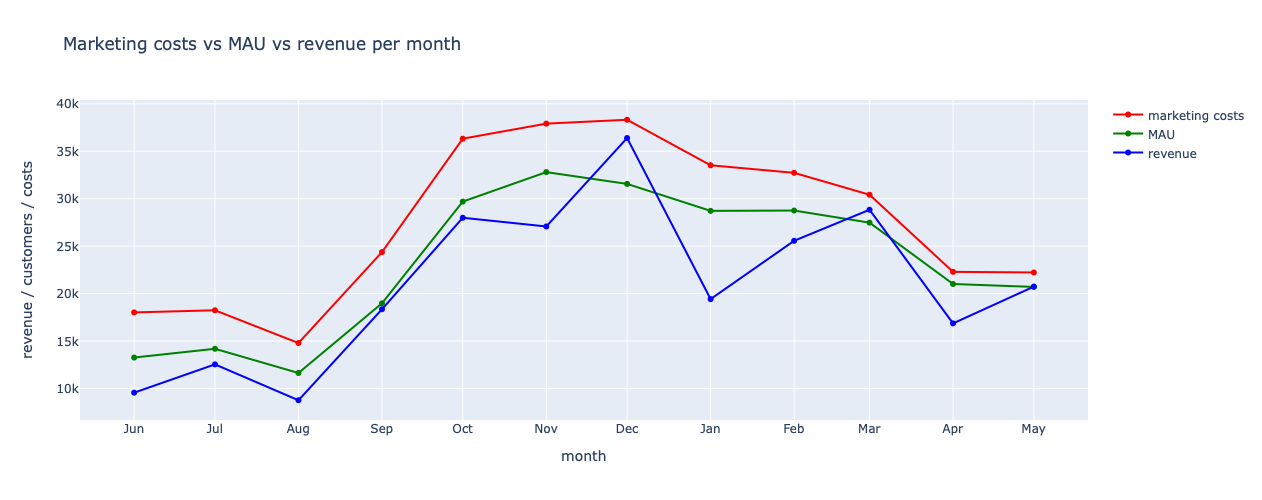

In [211]:
# exploring marketing costs vs number of visitors vs revenue per month
trace1 = go.Scatter(x=cost_per_month['month'], y=cost_per_month['costs'], mode='lines+markers', name='marketing costs', line=dict(color='red'))
trace2 = go.Scatter(x=mau['session_month'], y=mau['number_customers'], mode='lines+markers', name='MAU', line=dict(color='green'))
trace3 = go.Scatter(x=revenue_per_month['order_month'], y=revenue_per_month['revenue'], mode='lines+markers', name='revenue', line=dict(color='blue'))
data = [trace1, trace2, trace3]
layout = go.Layout(title='Marketing costs vs MAU vs revenue per month', xaxis=dict(title='month'), yaxis=dict(title='revenue / customers / costs'), width=1200, height=500)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = cost_per_month['month']))
fig.layout.xaxis.tickformat = '%b'
fig.show()

# an alternative way to plot this using Matplotlib:
# plt.figure(figsize=(15, 8))
# plt.plot(mau['session_month'], mau['number_customers'], color='blue', label='MAU')
# plt.plot(cost_per_month['month'], cost_per_month['costs'], color='red', label='Cost per month')
# plt.title('Marketing costs per month vs MAU')
# plt.xlabel('month')
# plt.ylabel('customers / costs')
# plt.legend()
# plt.grid(True)

# an alternative way to plot this using Plotly Express:
# fig = px.line(mau, x='session_month', y=[mau['number_customers'], cost_per_month['costs']], width=1200, height=500)
# fig.update_layout(xaxis_title = 'month', yaxis_title = 'number of customers / marketing costs',  title='Marketing costs per month vs MAU')
# fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = cost_per_month['month']))
# fig.update_traces({'name': 'MAU'}, selector={'name': 'number_customers'}, mode='markers+lines')
# fig.update_traces({'name': 'marketing cost'}, selector={'name': 'wide_variable_1'}, mode='markers+lines')
# fig.show()

# an alternative way to plot this by adding scatter using Plotly Express:
# fig = px.line(mau, x='session_month', y='number_customers', markers=True, width=1200, height=500)
# fig.update_layout(xaxis_title = 'month', yaxis_title = 'number of customers (blue) / marketing cost (red)', title='Marketing costs per month vs MAU')
# fig.add_scatter(x=cost_per_month['month'], y=cost_per_month['costs'], mode='markers+lines')
# fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = cost_per_month['month']))
# fig.show()

<h3>Conclusions</h3> <a id='conclusions_12'></a>

* The total marketing cost per year is 329132.

* Source 3 is by far the highest in terms of spending,  accounting for 43% of the annual marketing budget.

* Sources 9 and 10 are the lowest in terms of spending: 2% of the marketing budget.

* In the beginning, the marketing costs were low, then they started raising from September, and from January there is a gradual decrease in the spendings.

* The highest spendings on marketing were from October until December, while the lowest – in August.

* In August all marketing sources got the least budget.

* The marketing costs correlate strongly with the number of visitors per month during the whole period.

* The marketing costs are also  strongly correlated with the revenue until October.

* From November the revenue is not correlated with the marketing costs and MAU.

* __The correlation between marketing costs and MAU__ can be explained by:
    * increased product awareness and an enhanced engagement with it
    * targeted campaigns (e.g. demographic campaigns)
    * promotions or loyalty programs, which can help maintain or increase MAU


* __The correlation between marketing costs and revenue until October__ can be explained by:
    * marketing investments help attract new customers, which directly contributes to increased sales and revenue
    * product awareness enhances product recognition, leading to higher customer trust and willingness to purchase
    * customer retention via loyalty programs and personalized communication, can enhance retention and encourage repeat purchases, thus driving revenue


* __The lack of correlation between marketing costs and revenue from November__ could occur due to:
    * market saturation: in a saturated market, increased marketing spend might not lead to significant revenue growth, as potential customers have limited choices
    * decreasing returns: after a certain point, additional marketing spend may bring lower returns, meaning that further investment doesn’t significantly boost revenue
    * external factors: lack of events, or changes in consumer behavior can impact revenue independently of marketing spend.

[Back to Contents](#back)

<h3>2.3.2. customer acquisition cost</h3> <a id='customer_cost'></a>

How much did customer acquisition from each of the sources cost?

<h4>2.3.2.1. CAC per source</h4> <a id='cac_source'></a>

Steps to find CAC per source:
* find the initial ad source the customer came from (the table visits) \
  one customer can come from different sources for his later sessions \
  the table visits is used because even if the customer didn't buy anything, he originally came from the first source
* merge this data with the table orders
* find the number of buyers per source
* find the cost of marketing per source
* join these 2 tables
* calculate CAC per source = costs per source / buyers per source

In [217]:
# defining the first source the customers came from as the main source
first_source = visits.sort_values('start_ts').groupby('uid').first()['source_id'].reset_index()
first_source.columns=['uid','first_source']
first_source.head()

uid  first_source
0   11863502262781             3
1   49537067089222             2
2  297729379853735             3
3  313578113262317             2
4  325320750514679             5

In [218]:
# merging the data on the first source with the table orders
orders = orders.merge(first_source, on=['uid'], how='left')
orders.head()

buy_ts  revenue                   uid order_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01   

          first_order first_order_month  lifetime  first_source  
0 2017-06-01 00:10:00        2017-06-01         0             1  
1 2017-06-01 00:25:00        2017-06-01         0             2  
2 2017-06-01 00:27:00        2017-06-01         0             2  
3 2017-06-01 00:29:00        2017-06-01         0             2  
4 2017-06-01 07:58:00        2017-06-01         0             3

In [219]:
# the number of buyers per source
buyers_per_source = orders.groupby('first_source')['uid'].nunique().reset_index()
buyers_per_source.columns = ['source', 'buyers']
buyers_per_source

source  buyers
0       1    2899
1       2    3506
2       3   10473
3       4   10295
4       5    6931
5       7       1
6       9    1088
7      10    1329

In [220]:
# the cost of marketing per source
marketing_per_source = expenses.groupby('source_id')['costs'].sum().reset_index()
marketing_per_source.columns = ['source', 'costs']
marketing_per_source

source      costs
0       1   20833.27
1       2   42806.04
2       3  141321.63
3       4   61073.60
4       5   51757.10
5       9    5517.49
6      10    5822.49

In [221]:
# joining these 2 tables together
CAC_per_source = marketing_per_source.merge(buyers_per_source, on=['source'], how='left')
CAC_per_source

source      costs  buyers
0       1   20833.27    2899
1       2   42806.04    3506
2       3  141321.63   10473
3       4   61073.60   10295
4       5   51757.10    6931
5       9    5517.49    1088
6      10    5822.49    1329

In [222]:
# calculating CAC per source
CAC_per_source['CAC_source'] = CAC_per_source['costs'] / CAC_per_source['buyers']
CAC_per_source.round(1)

source     costs  buyers  CAC_source
0       1   20833.3    2899         7.2
1       2   42806.0    3506        12.2
2       3  141321.6   10473        13.5
3       4   61073.6   10295         5.9
4       5   51757.1    6931         7.5
5       9    5517.5    1088         5.1
6      10    5822.5    1329         4.4

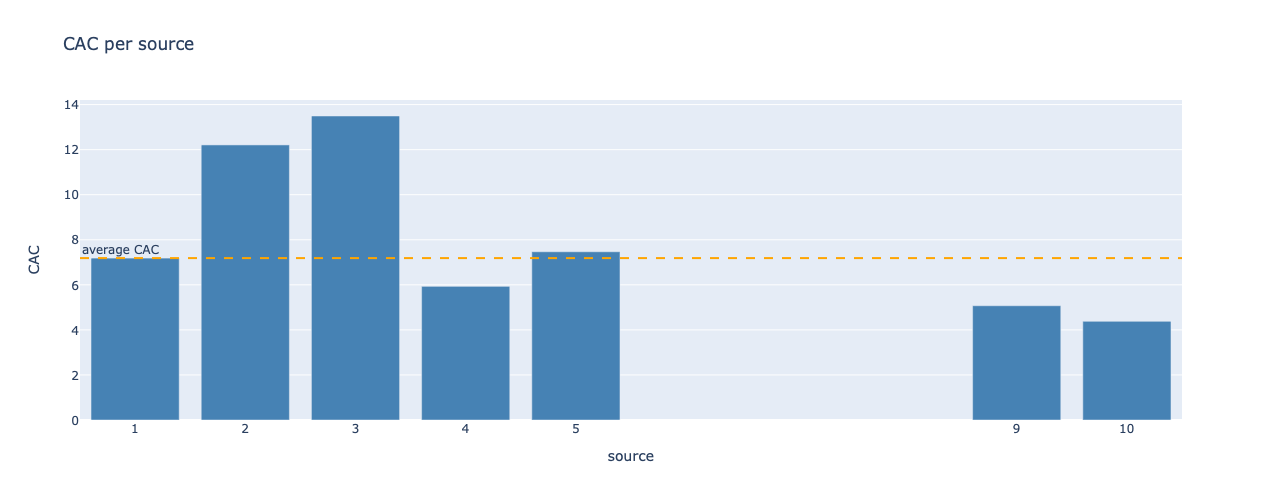

In [223]:
# plotting CAC per source
fig_cac = px.bar(CAC_per_source, x='source', y='CAC_source', title='CAC per source', width=1200, height=500)
fig_cac.update_layout(xaxis_title = 'source', yaxis_title = 'CAC', showlegend=False)
fig_cac.update_layout(xaxis = dict(tickmode = 'array', tickvals = CAC_per_source['source']))
#adding reference line with the average CAC
fig_cac.add_hline(y=CAC_per_source['CAC_source'].median(),line_dash="dash", line_color="orange", annotation_text="average CAC", annotation_position="top left")
fig_cac.update_traces(marker_color='steelblue')
fig_cac.show()

[Back to Contents](#back)

<h4>2.3.2.2. CAC vs conversion rate per source</h4> <a id='cac_conversion'></a>

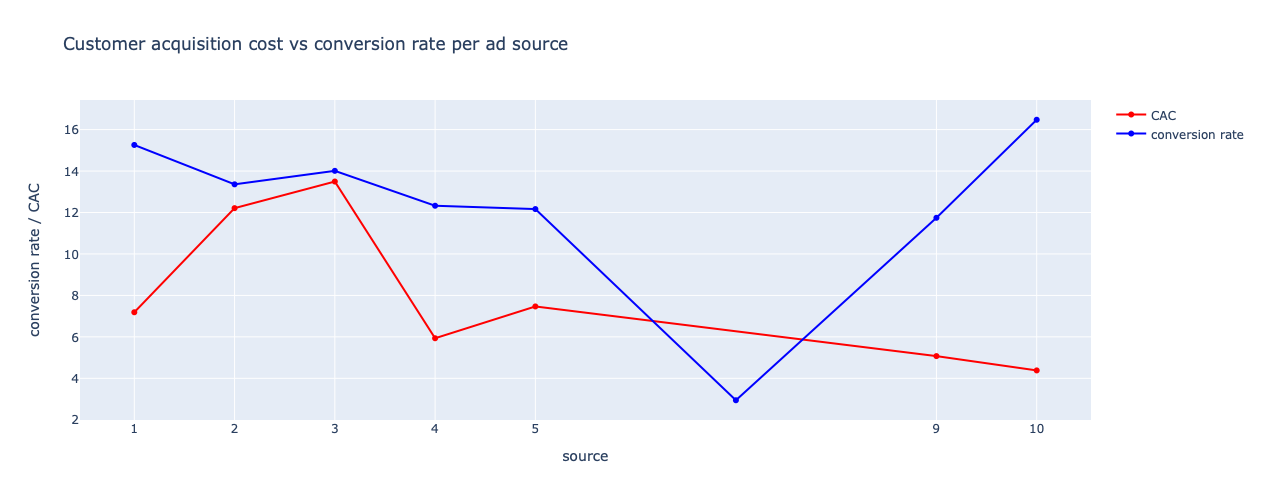

In [226]:
# exploring customer acquisition cost vs conversion rate per ad source
trace1 = go.Scatter(x=CAC_per_source['source'], y=CAC_per_source['CAC_source'], mode='lines+markers', name='CAC', line=dict(color='red'))
trace2 = go.Scatter(x=conversion_rate_channel['source_id'], y=conversion_rate_channel['conversion_rate_per_channel'], mode='lines+markers', name='conversion rate', line=dict(color='blue'))
data = [trace1, trace2]
layout = go.Layout(title='Customer acquisition cost vs conversion rate per ad source', xaxis=dict(title='source'), yaxis=dict(title='conversion rate / CAC'), width=1200, height=500)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = CAC_per_source['source']))
fig.show()

[Back to Contents](#back)

<h4>2.3.2.3. CAC per month</h4> <a id='cac_month'></a>

Steps to find CAC per month:
* find the cost of marketing per month \
  found in step 2.3.1. money spent per source: \
  cost_per_month = expenses.groupby('month')['costs'].sum().reset_index()
* find the number of buyers per month \
  found in step 2.2.2. number of orders: \
  cohort_customers = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index() \
  cohort_customers.columns=['first_order_month','cohort_size']
* join these 2 tables
* calculate CAC = costs / buyers

In [230]:
# marketing costs per month
marketing_per_month = cost_per_month[['month', 'costs']]
marketing_per_month

month     costs
0  2017-06-01  18015.00
1  2017-07-01  18240.59
2  2017-08-01  14790.54
3  2017-09-01  24368.91
4  2017-10-01  36322.88
5  2017-11-01  37907.88
6  2017-12-01  38315.35
7  2018-01-01  33518.52
8  2018-02-01  32723.03
9  2018-03-01  30415.27
10 2018-04-01  22289.38
11 2018-05-01  22224.27

In [231]:
# number of buyers per month
buyers_per_month = cohort_customers
buyers_per_month.columns = ['month','buyers']
buyers_per_month

month  buyers
0  2017-06-01    2023
1  2017-07-01    1923
2  2017-08-01    1370
3  2017-09-01    2581
4  2017-10-01    4340
5  2017-11-01    4081
6  2017-12-01    4383
7  2018-01-01    3373
8  2018-02-01    3651
9  2018-03-01    3533
10 2018-04-01    2276
11 2018-05-01    2988

In [232]:
# joining these 2 tables together
CAC_per_month = marketing_per_month.merge(buyers_per_month, on=['month'], how='left')
CAC_per_month

month     costs  buyers
0  2017-06-01  18015.00    2023
1  2017-07-01  18240.59    1923
2  2017-08-01  14790.54    1370
3  2017-09-01  24368.91    2581
4  2017-10-01  36322.88    4340
5  2017-11-01  37907.88    4081
6  2017-12-01  38315.35    4383
7  2018-01-01  33518.52    3373
8  2018-02-01  32723.03    3651
9  2018-03-01  30415.27    3533
10 2018-04-01  22289.38    2276
11 2018-05-01  22224.27    2988

In [233]:
# calculating CAC per month
CAC_per_month['CAC_month'] = CAC_per_month['costs'] / CAC_per_month['buyers']
CAC_per_month.round(1)

month    costs  buyers  CAC_month
0  2017-06-01  18015.0    2023        8.9
1  2017-07-01  18240.6    1923        9.5
2  2017-08-01  14790.5    1370       10.8
3  2017-09-01  24368.9    2581        9.4
4  2017-10-01  36322.9    4340        8.4
5  2017-11-01  37907.9    4081        9.3
6  2017-12-01  38315.4    4383        8.7
7  2018-01-01  33518.5    3373        9.9
8  2018-02-01  32723.0    3651        9.0
9  2018-03-01  30415.3    3533        8.6
10 2018-04-01  22289.4    2276        9.8
11 2018-05-01  22224.3    2988        7.4

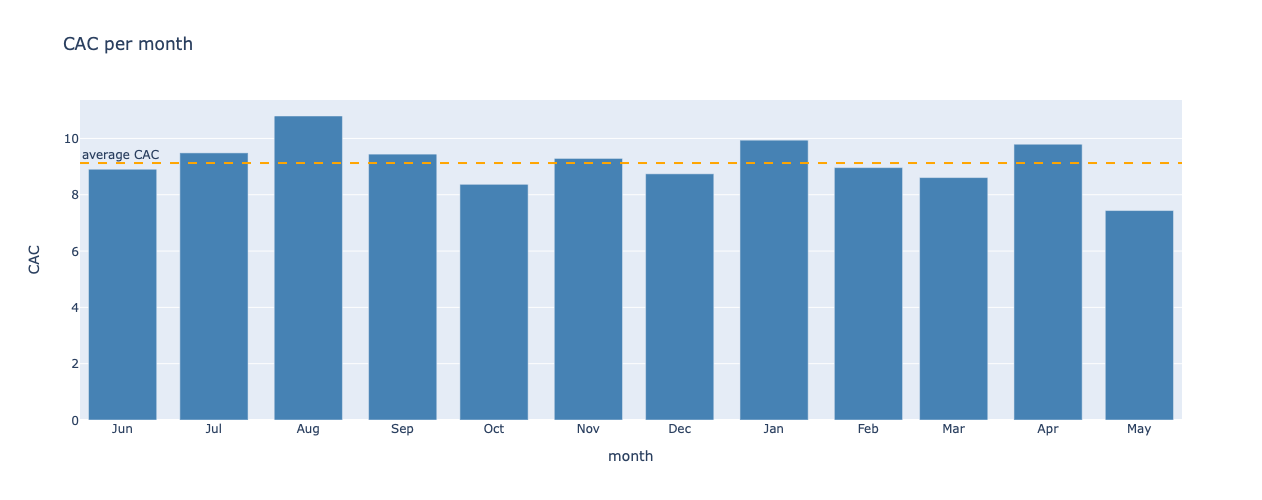

In [234]:
# plotting CAC per month
fig_cac = px.bar(CAC_per_month, x='month', y='CAC_month', title='CAC per month', width=1200, height=500)
fig_cac.update_layout(xaxis_title = 'month', yaxis_title = 'CAC', showlegend=False)
fig_cac.update_layout(xaxis = dict(tickmode = 'array', tickvals = CAC_per_month['month']))
fig_cac.layout.xaxis.tickformat = '%b'
#adding reference line with the average CAC over months
fig_cac.add_hline(y=CAC_per_month['CAC_month'].median(),line_dash="dash", line_color="orange", annotation_text="average CAC", annotation_position="top left")
fig_cac.update_traces(marker_color='steelblue')
fig_cac.show()

[Back to Contents](#back)

<h4>2.3.2.4. CAC vs average check per month</h4> <a id='cac_check'></a>

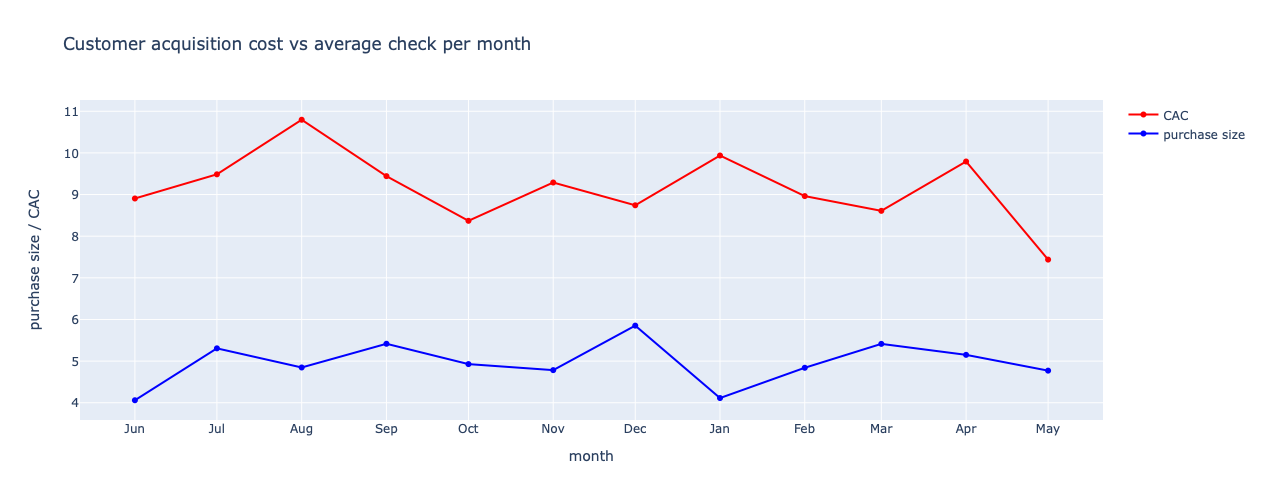

In [237]:
# exploring customer acquisition cost vs average check per month
trace1 = go.Scatter(x=CAC_per_month['month'], y=CAC_per_month['CAC_month'], mode='lines+markers', name='CAC', line=dict(color='red'))
trace2 = go.Scatter(x=check_per_month['order_month'], y=check_per_month['average_check'], mode='lines+markers', name='purchase size', line=dict(color='blue'))
data = [trace1, trace2]
layout = go.Layout(title='Customer acquisition cost vs average check per month', xaxis=dict(title='month'), yaxis=dict(title='purchase size / CAC'), width=1200, height=500)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = CAC_per_month['month']))
fig.layout.xaxis.tickformat = '%b'
fig.show()

[Back to Contents](#back)

<h4>2.3.2.5. CAC per source per month</h4> <a id='cac_source_month'></a>

Steps to find CAC per source per month:
* find the initial ad source the customer came from (the table visits) \
  found in calculations of CAC per source
* merge this data with the table orders \
  done in calculations of CAC per source
* find the number of buyers per month per source
* find the cost of marketing per month per source \
  found in step 2.3.1. money spent per source: \
  cost_month_source = expenses.groupby(['month', 'source_id'])['costs'].sum().reset_index()
* join these 2 tables
* calculate CAC per source per month = costs per source per month / buyers per source per month

In [241]:
# the number of buyers per month per source
buyers_per_moth_source = orders.groupby(['first_order_month', 'first_source'])['uid'].nunique().reset_index()
buyers_per_moth_source.columns = ['month','source_id','buyers']
buyers_per_moth_source.head()

month  source_id  buyers
0 2017-06-01          1     190
1 2017-06-01          2     235
2 2017-06-01          3     638
3 2017-06-01          4     413
4 2017-06-01          5     384

In [242]:
# the cost of marketing per month per source
cost_month_source.head()

month  source_id    costs
0 2017-06-01          1  1125.61
1 2017-06-01          2  2427.38
2 2017-06-01          3  7731.65
3 2017-06-01          4  3514.80
4 2017-06-01          5  2616.12

In [243]:
# joining these 2 tables
CAC_per_month_source = cost_month_source.merge(buyers_per_moth_source, on=['month','source_id'], how='left')
CAC_per_month_source.head()

month  source_id    costs  buyers
0 2017-06-01          1  1125.61     190
1 2017-06-01          2  2427.38     235
2 2017-06-01          3  7731.65     638
3 2017-06-01          4  3514.80     413
4 2017-06-01          5  2616.12     384

In [244]:
# calculating CAC per source per month
CAC_per_month_source['CAC'] = (CAC_per_month_source['costs'] / CAC_per_month_source['buyers']).round(1)
CAC_per_month_source.head()

month  source_id    costs  buyers   CAC
0 2017-06-01          1  1125.61     190   5.9
1 2017-06-01          2  2427.38     235  10.3
2 2017-06-01          3  7731.65     638  12.1
3 2017-06-01          4  3514.80     413   8.5
4 2017-06-01          5  2616.12     384   6.8

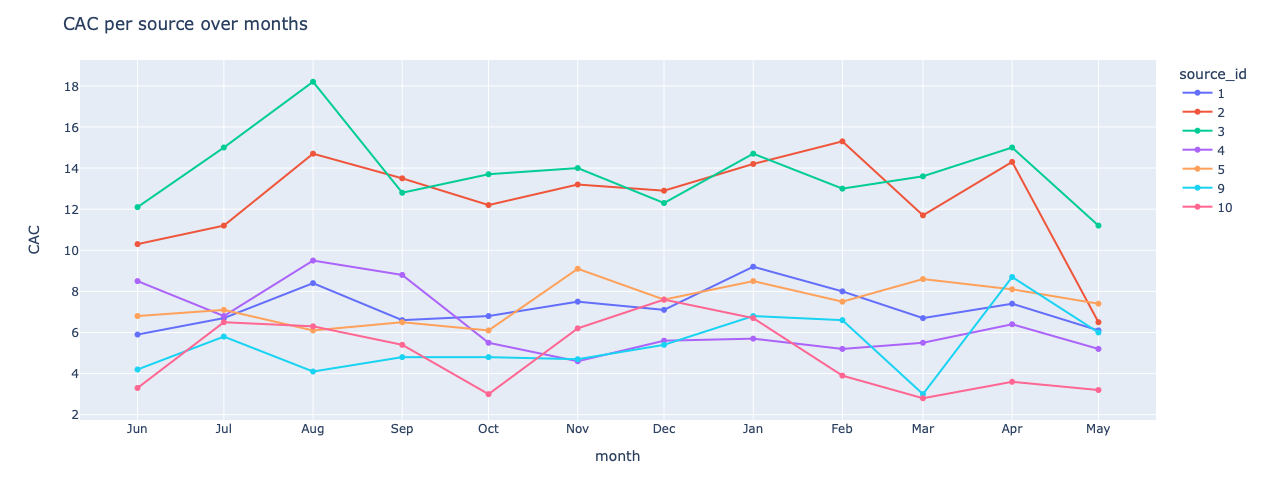

In [245]:
# plotting CAC per source per month
fig_cacs = px.line(CAC_per_month_source, x='month', y='CAC', color='source_id', width=1200, height=500)
fig_cacs.update_traces(mode='markers+lines')
fig_cacs.update_layout(xaxis_title = 'month', yaxis_title = 'CAC',  title='CAC per source over months')
fig_cacs.update_layout(xaxis = dict(tickmode = 'array', tickvals = CAC_per_month_source['month']))
fig_cacs.layout.xaxis.tickformat = '%b'
fig_cacs.show()

<h3>Conclusions</h3> <a id='conclusions_13'></a>

* Customers from the source 3 have the highest CAC, closely followed by the source 2. \
  But their conversion rate is close to that of the channels 1, 4 and 5, while CAC for these channels is almost twice less.

* Customer acquisition from the sources 9 and 10 costs the least amount of money. \
  At the same time, the conversion rate is high for these ad channels, which makes them worth expanding.

* Ad sources 2 and 3 have high CAC during the whole year (between 10 and 18), except for May for the source 2.

* All other ad sources CAC stays between 3 and 10 usd during the whole year.

* The minimum CAC is in May (7.4 usd). 

* The highest CAC is in August (10.8 usd).

* CAC does not vary a lot per month. It stays around the average value during the whole period, except for May. \
  At the same time, marketing costs have strong variation during the whole period. \
  It means that high marketing costs do bring lots of new buyers.

* Comparing the customer acquisition cost with the average check per month shows that CAC is higher than the average purchase size throughout all months. \
  It can mean:
    * high marketing costs to acquire customers, but customers aren’t spending much on their purchases.
    * unbalanced promotional strategies when customers buy at lower price through promotions. This drops the average purchase size, making CAC high.
    * low LTV when customers don’t tend to return or make repeat purchases, making the initial acquisition cost lower than their spendings.

* It is also notable that peak CAC values correspond to low purchase sizes, and vice versa. \
  This can be explained by the time shift between marketing and purchase: people start buying only a month later after a marketing campaign.

[Back to Contents](#back)

<h3>2.3.3. ROI</h3> <a id='ROI'></a>

How worthwhile where the investments? (ROI)

<h4>2.3.3.1. ROI per cohort</h4> <a id='ROI_cohort'></a>

Steps to find ROI per cohort:
* find LTV for monthly cohorts \
  found in step 2.2.4. LTV \
  ltv_cohort = orders.groupby(['first_order_month','lifetime'])['revenue'].sum().reset_index() \
  ltv = ltv_cohort.merge(cohort_customers, on=['first_order_month'], how='left') \
  ltv['ltv'] = ltv['revenue'] / ltv['cohort_size']
* find CAC per month \
  found in step 2.3.2.3. CAC per month \
  CAC_per_month = marketing_per_month.merge(buyers_per_month, on=['month'], how='left') \
  CAC_per_month['CAC_month'] = CAC_per_month['costs'] / CAC_per_month['buyers']
* merge these 2 tables together
* calculate ROI cohort = LVT per monthly cohort / CAC per month

In [251]:
LTV_per_month_ROI = ltv[['first_order_month', 'lifetime', 'ltv']]
CAC_per_month_ROI = CAC_per_month[['month', 'CAC_month']]
CAC_per_month_ROI.columns=['first_order_month','cac']

In [252]:
# merging 2 tables together
ROI = LTV_per_month_ROI.merge(CAC_per_month_ROI, on=['first_order_month'], how='left')
ROI.head()

first_order_month  lifetime       ltv       cac
0        2017-06-01         0  4.724414  8.905091
1        2017-06-01         1  0.485329  8.905091
2        2017-06-01         2  0.437637  8.905091
3        2017-06-01         3  0.954671  8.905091
4        2017-06-01         4  1.022531  8.905091

In [253]:
# calculating ROI per cohort
ROI['roi'] = ROI['ltv'] / ROI['cac']
ROI.head()

first_order_month  lifetime       ltv       cac       roi
0        2017-06-01         0  4.724414  8.905091  0.530530
1        2017-06-01         1  0.485329  8.905091  0.054500
2        2017-06-01         2  0.437637  8.905091  0.049145
3        2017-06-01         3  0.954671  8.905091  0.107205
4        2017-06-01         4  1.022531  8.905091  0.114825

In [254]:
# creating a pivot table for ROI per cohort
# the method cumsum() is applied to the pivot table to calculate cumulative ROI
ROI_pivot = ROI.pivot_table(index='first_order_month', columns='lifetime', values='roi', aggfunc='mean').cumsum(axis=1).round(2)
ROI_pivot.fillna('')

lifetime             0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.53  0.59  0.63  0.74  0.86  0.94  1.05  1.11  1.17  1.24   
2017-07-01         0.63  0.67  0.73  0.77  0.79  0.81  0.82  0.84  0.85  0.87   
2017-08-01         0.49  0.53  0.57  0.61  0.66  0.68   0.7  0.74  0.77  0.78   
2017-09-01         0.60  0.72  0.77  1.19  1.23   1.3  1.38   1.4  1.42         
2017-10-01         0.60  0.66  0.68   0.7  0.72  0.74  0.75  0.76               
2017-11-01         0.55   0.6  0.62  0.65  0.67  0.68  0.69                     
2017-12-01         0.54  0.57  0.68   0.8  0.84  0.87                           
2018-01-01         0.42  0.45  0.48  0.49   0.5                                 
2018-02-01         0.46  0.49   0.5  0.51                                       
2018-03-01         0.56   0.6  0.63                                             
2018-04-01         0.48  0.53                                                   
2018-05-01         0.63                                                         

lifetime             10    11  
first_order_month              
2017-06-01         1.31  1.33  
2017-07-01         0.88        
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01

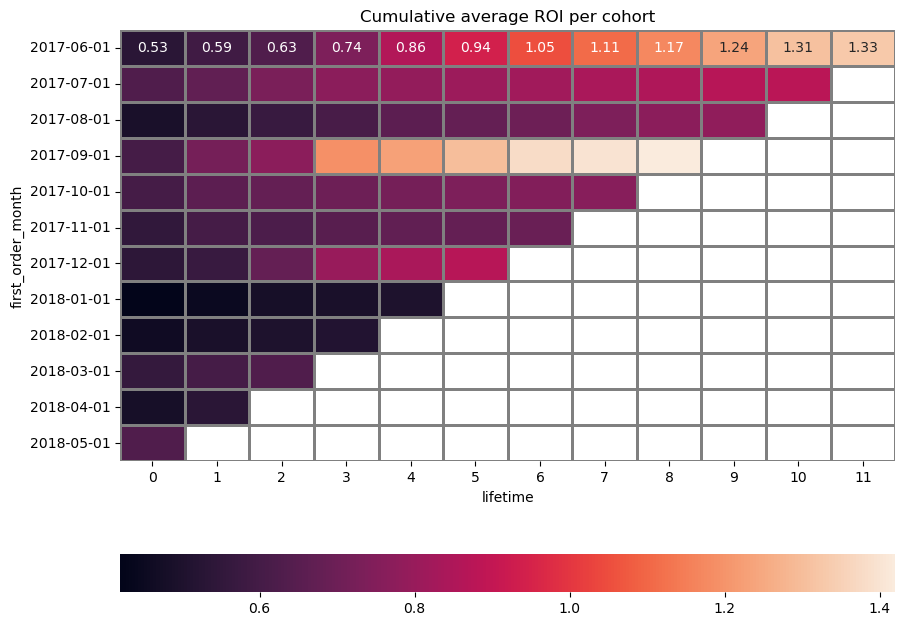

In [255]:
# visualizing ROI per cohort via heatmap
ROI_pivot.index = ROI_pivot.index.astype(str)
plt.figure(figsize=(10, 8))
sns.heatmap(ROI_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'}).set(title ='Cumulative average ROI per cohort')
plt.show()

[Back to Contents](#back)

<h4>2.3.3.2. ROMI per source</h4> <a id='ROI_source'></a>

Steps to find ROMI (Return On Marketing Investment) per source:
* find LTV per source
* find CAC per source \
  found in step 2.3.2.1. CAC per source \
  CAC_per_source = marketing_per_source.merge(buyers_per_source, on=['source'], how='left') \
  CAC_per_source['CAC_source'] = CAC_per_source['costs'] / CAC_per_source['buyers']
* merge these 2 tables together
* calculate ROMI source = LVT per source / CAC per source

In [259]:
# finding LTV per source
# LTV per source = revenue per source / buyers per source
ltv_per_source = orders.groupby('first_source')[['uid','revenue']].agg({'uid':'nunique','revenue':'sum'}).reset_index()
ltv_per_source.columns = ['source', 'buyers', 'revenue']
ltv_per_source['ltv'] = ltv_per_source['revenue'] / ltv_per_source['buyers']
ltv_per_source

source  buyers   revenue        ltv
0       1    2899  31090.55  10.724577
1       2    3506  46923.61  13.383802
2       3   10473  54511.24   5.204931
3       4   10295  56693.41   5.506888
4       5    6931  52624.02   7.592558
5       7       1      1.22   1.220000
6       9    1088   5759.40   5.293566
7      10    1329   4450.33   3.348631

In [260]:
# CAC per source
cac_source = CAC_per_source[['source', 'CAC_source']]
cac_source.columns = ['source', 'cac']
cac_source

source        cac
0       1   7.186364
1       2  12.209367
2       3  13.493901
3       4   5.932356
4       5   7.467479
5       9   5.071222
6      10   4.381106

In [261]:
# merging 2 tables together
ROMI = cac_source.merge(ltv_per_source, on=['source'], how='left')
ROMI

source        cac  buyers   revenue        ltv
0       1   7.186364    2899  31090.55  10.724577
1       2  12.209367    3506  46923.61  13.383802
2       3  13.493901   10473  54511.24   5.204931
3       4   5.932356   10295  56693.41   5.506888
4       5   7.467479    6931  52624.02   7.592558
5       9   5.071222    1088   5759.40   5.293566
6      10   4.381106    1329   4450.33   3.348631

In [262]:
# calculating ROMI per source
ROMI['romi'] = ROMI['ltv'] / ROMI['cac']
ROMI

source        cac  buyers   revenue        ltv      romi
0       1   7.186364    2899  31090.55  10.724577  1.492351
1       2  12.209367    3506  46923.61  13.383802  1.096191
2       3  13.493901   10473  54511.24   5.204931  0.385725
3       4   5.932356   10295  56693.41   5.506888  0.928280
4       5   7.467479    6931  52624.02   7.592558  1.016750
5       9   5.071222    1088   5759.40   5.293566  1.043844
6      10   4.381106    1329   4450.33   3.348631  0.764335

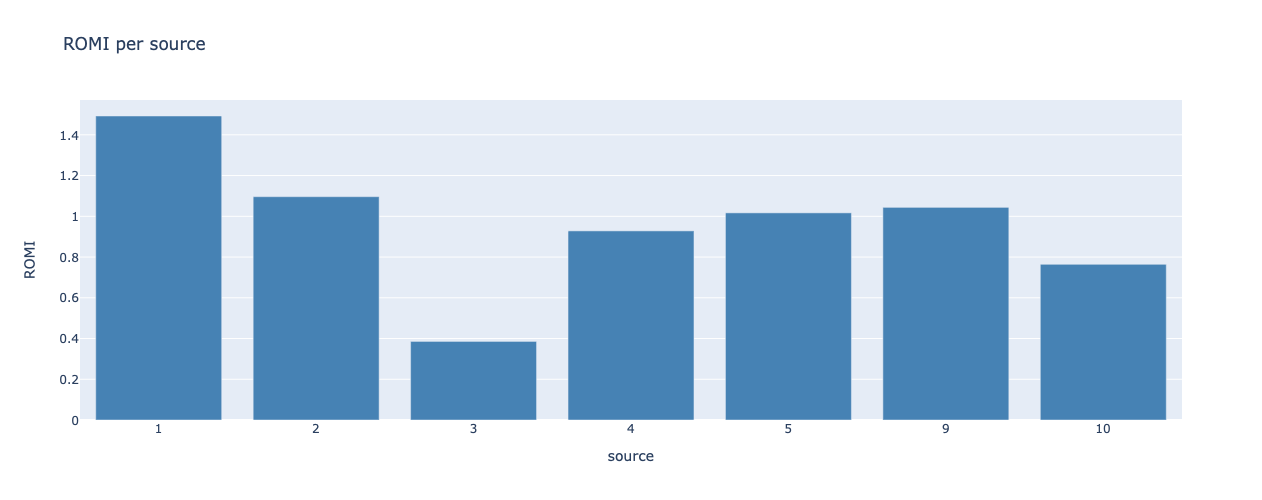

In [263]:
# plotting ROMI per source
fig_romi = px.bar(ROMI, x='source', y='romi', title='ROMI per source', width=1200, height=500)
fig_romi.update_layout(xaxis_title = 'source', yaxis_title = 'ROMI', showlegend=False)
fig_romi.update_xaxes(type='category')
fig_romi.update_traces(marker_color='steelblue')
fig_romi.show()

[Back to Contents](#back)

<h3>Conclusions</h3> <a id='conclusions_14'></a>

* __ROI per cohort__
    * The return on investment is below 0 for all months for all cohorts, except for June and September cohorts. \
      It means that only those 2 cohorts have paid off.

    * The June cohort has paid off by the 6th month, and September even earlier – by the 3rd month. \
      The LTV for these 2 cohorts also stands out – they are the highest among all cohorts, while the CAC values are very similar to other cohorts.

    * By the 4th month the January cohort has the lowest ROI. \
      Initially in the 0th lifetime, this cohort has the lowest ROI as well. \
      This can be due to high CAC and low LTV values for this cohort.

    * The August cohort has the highest CAC, but its ROI is below 0. \
      At the same time CAC for September is lower, but ROI is the highest. \
      It can mean that customers acquired in August started actively making purchases only in September.

    * In general, the cohorts behave differently in terms of ROI, despite almost the same costs spent on them. \
      It means that ROI is mostly influenced by LTV and not CAC.


* __ROMI per source__
    * Only ad sources 1, 2, 5 and 9 have paid off.

    * Source 1 has the highest ROMI. \
      Marketing spendings on it paid off on 149%. \
      This source has the second highest LTV and an average CAC.

    * Source 3 has the lowest ROMI, because it is the most expensive one (has the highest CAC), but its LTV is average.

    * Source 3 brings almost the same number of buyers and revenue as source 4 (the same LTV), \
      but source 4 is twice cheaper in terms of CAC, which makes it more interesting for further development than source 3.

    * Source 5 has paid off, but it is more expensive than source 4 and also brings less buyers than source 4, \
      while the revenue from them is almost the same. This makes source 4 a better choice than source 5.

    * Sources 2 and 9 have similar ROMI, but source 2 costs 2.5 times more than source 9. \
      At the same time source 2 brings 3.5 times more buyers and their LTV is twice bigger than that of source 9. \
      As a recommendation, both of these sources can be used further, but source 9 needs more development to bring more customers.

    * Source 10 has CAC similar to source 9 and brings even more buyers, but its LTV is smaller and ROMI is below 0, so it has not paid off.

    * In general, ROMI is influenced by both CAC and LTV.

[Back to Contents](#back)

<h2>Marketing summary</h2> <a id='summary_4'></a>

1. The total marketing cost per year is 329132 usd.
2. Source 3 is the most expensive: 43% of the annual marketing budget.
3. Sources 9 and 10 are the cheapest: 2% of the marketing budget.
4. The marketing costs follow a curve: low in the beginning, raising from September, decreasing from January.
5. From October until December marketing costs are the highest, in August all sources got the least budget.
6. The marketing costs correlate with MAU during the whole period, and with the revenue until October.
7. Attracting customers via the ad sources 2 and 3 is the most expensive (12.2 and 13.5 usd per user) and stays high during the whole year.
8. Customer acquisition from the sources 9 and 10 costs the least amount of money (4.4 and 5.1 usd per user).
9. CAC of the other ad sources stays between 3 and 10 usd during the whole year.
10. The minimum CAC is in May (7.4 usd).
11. The highest CAC is in August (10.8 usd).
12. CAC does not vary a lot per month. It stays around the average value during the whole period, except for May.
13. CAC is higher than the average purchase size throughout all months.
14. ROI is below 0 for all months for all cohorts, except for June and September cohorts.
15. Only 2 cohorts have paid off: the September cohort - by the 3rd month, the June cohort - by the 6th month.
16. The January cohort has the lowest ROI initially, and by the 4th lifetime month as well.
17. In general, ROI is mostly influenced by LTV and not CAC.
18. For ROMI: ad sources 1, 2, 5 and 9 have paid off.
19. Source 1 has the highest ROMI: 149%.
20. Source 3 has the lowest ROMI: 39%.
21. In general, ROMI is influenced by both LTV and CAC.

[Back to Contents](#back)

<h1>3. Recommendations</h1> <a id='recommendations'></a>

<h2>3.1. Product recommendations</h2> <a id='recommendations_product'></a>

The interaction with the product is explored using these metrics:
* number of customers (DAU, WAU, MAU)
* number of sessions
* session length (ASL)
* user retention rate

On average, the website has 908 new visitors daily, 5724 per week, and 23228 per month.

__The engagement with the product__ has a clear seasonality effect. \
Most visits occur during autumn and winter months, in spring the activity starts to decrease, with the least number of active users during summer time. \
This can be explained by seasonal conditions, when people tend to spend more time on indoor activities rather than being outside during winter months, and in summer time they prefer outdoor activities and go on vacation.

People usually have __1 session__ on the website __per day__. \
This is a good indicator that the website is used on a daily basis. \
Although the number of sessions per day follows the seasonal curve, the number of sessions per user stays almost the same every day: only 1. \
So the peak values in the amount of sessions per day are due to the increased number of visitors on those days and not because each customer interacted more with the website on these days.

__The average session lenght__ is not changing much over time. \
Most frequently it lasts 1 minute, and on average a user spends 4-6 minutes on a session. \
This can be explained by the primary goals of the service usage: people visit it to check what events are out there, or to buy a ticket for an event.

__Retention rate__ indicates how well customers stay with the service after the first visit. \
The longer a customer uses the service, the greater the potential revenue. \
Winter and spring cohorts have a lower retention rate compared to summer and autumn cohorts. \
Probably, people who start using the website services in winter and spring are occasional users who want to find an extra activity due to reduced outdoor activities at those months, while those who started using the services during summer and autumn are explicitly interested in such events, so their activity does not depend on the time of the year.


__*Recommendations:*__

1. Since there are lots of new customers during autumn-winter time, offer more products for purchase during these months to increase potential revenue.
2. During spring-summer time when the activity is low, focus on loyalty programs for existing customers, and offer attractive campaigns for new users.
3. Offer interesting long-term programs for winter and spring cohorts to make sure they keep using the service not just for a few months, but for longer periods.

<h2>3.2. Sales recommendations</h2> <a id='recommendations_sales'></a>

The buyers behavior is explored using these metrics:
* conversion time and conversion rate
* number of orders
* average check
* LTV

__Conversion__ shows when customers start paying, how long it takes from the first visit to the purchase. \
On average, a website visitor makes a purchase on the same day. \
75% of visitors are converted into buyers within 2 days. \
This can be due to the fact that people use the service with a purpose to either look up an event or to buy a ticket for it.

__Conversions rate__ reflects the number of visitors that made a purchase. \
It’s a key indicator of marketing effectiveness and helps determine which marketing channel is most effective. \
Overall, 16% of users are converted into buyers. \
At first glance, it takes marketing channels 3 and 4 the longest to convert customers. \
But further exploration of the data shows that the total convertion time strongly correlates with the number of ads per channel. \
Ad source 9 requires the longest time to convert customers into buyers, and has the lowest conversion rate. \
While sources 1 and 10 take the least time to convert visitors into buyers, and have the highest conversion rate.

__Number of orders__ helps understand if purchasing behavior changes over time depending on a cohort. \
A customer makes on average 1 order in his 0th lifetime, and after that the number of orders drops significantly for each cohort for all subsequent months. \
This can be because customers use the service just to buy a ticket for a particular event and do not spend money on the service further on. \
June cohort has the highest number of orders during all lifetimes. \
Cumulatively, all summer months, September and November cohorts make 1.5-2 orders per user by the end of their lifetime.

__Average check__ shows the typical amount spent per transaction and can inform pricing and upselling strategies. \
The average purchase size per customer and overall is 2.5 usd. \
There is no seasonal effect on the average check per month, despite the lower number of visitors during autumn-winter month. \
The possible reason for it, is that loyal customers steadily pay each month and thus compensate for the lower user engagement during spring-summer months. \
Overall, customers start spending more money over time. \
September and December cohorts have high average check during all their lifetime.

__Comparing the number of orders with the average check__, these trends in the customer behavior can be seen:
* June cohort makes lots of transactions, but the purchase size per order is small
* September and December cohorts make less orders, but pay more for each order

__LTV__ measures the total amount of money a customer brings to the company over his entire relationship with the business. \
It indicates long-term profitability. \
For LTV calculations, the assumption is made that margin rate is 1. \
In the 0th lifetime month:
* July and September cohorts bring the highest amount of money (6.01 and 5.64)
* January and February cohorts have the lowest LTV (4.14 and 4.16)

All winter (except for December) and spring cohorts have lower LTV compared to summer and autumn cohorts. \
September and June cohorts have the highest cumulative LTV by the end of the lifetime.


__*Recommendations:*__

1. The most effective marketing channels for customer conversion are 1 and 10.
2. The marketing channel 9 is the least effective for customer conversion.
3. Explore June cohort, which has the highest number of orders over time, to understand what marketing strategy led to such stable purchasing behavior.
4. Investigate what type of customers make up the September and December cohorts, which have high average check during all lifetime.

<h2>3.3. Marketing recommendations</h2> <a id='recommendations_marketing'></a>

The marketing strategy is explored using these metrics:
* money spent per source
* customer acquisition cost (CAC)
* ROI and ROMI

The total __marketing cost__ per year is 329132 usd.\
Source 3 is the most expensive: 43% of the annual marketing budget.\
Sources 9 and 10 are the cheapest: 2% of the marketing budget.

The marketing costs follow a curve: low in the beginning, raising from September, decreasing from January.\
From October until December marketing costs are the highest, in August all sources got the least budget.

The marketing costs correlate strongly with MAU during the whole period, and with the revenue until October.\
This can be explained by:
* increased product awareness and an enhanced engagement with it, leading to higher customer trust and willingness to purchase
* targeted campaigns that help attract new customers, which directly contributes to increased sales and revenue
* promotions or loyalty programs and personalized communication, which help maintain or increase MAU and enhance retention encouraging repeat purchases

From November the revenue is not correlated with the marketing costs and MAU.
This could occur due to:
* market saturation: in a saturated market, increased marketing spend might not lead to significant revenue growth, as potential customers have limited choices
* decreasing returns: after a certain point, additional marketing spend may bring lower returns, meaning that further investment doesn’t significantly boost revenue
* external factors: lack of events, or changes in consumer behavior can impact revenue independently of marketing spend.

__Customer acquisition cost (CAC)__ reflects the money a new customer costs a company. \
Attracting customers via the ad sources 2 and 3 is the most expensive (12.2 and 13.5 usd per user) and stays high during the whole year.\
But their conversion rate is close to that of the channels 1, 4 and 5, while CAC for these channels is almost twice less.\
Customer acquisition from the sources 9 and 10 costs the least amount of money (4.4 and 5.1 usd per user).\
At the same time, the conversion rate is high for these ad channels, which makes them worth expanding.\
CAC of the other ad sources stays between 3 and 10 usd during the whole year.

The minimum CAC is in May (7.4 usd).\
The highest CAC is in August (10.8 usd).\
CAC does not vary a lot per month. It stays around the average value during the whole period, except for May.\
At the same time, marketing costs have strong variation during the whole period.\
It means that high marketing costs do bring lots of new buyers.

__Comparing the customer acquisition cost with the average check per month__ shows that CAC is higher than the average purchase size throughout all months. \
It can mean:
* high marketing costs to acquire customers, but customers aren’t spending much on their purchases.
* unbalanced promotional strategies when customers buy at lower price through promotions. This drops the average purchase size, making CAC high.
* low LTV when customers don’t tend to return or make repeat purchases, making the initial acquisition cost lower than their spendings.

It is also notable that peak CAC values correspond to low purchase sizes, and vice versa. \
This can be explained by the time shift between marketing and purchase: people start buying only a month later after a marketing campaign.

__Return on investment (ROI)__ \
ROI is below 0 for all months for all cohorts, except for June and September cohorts.\
Only 2 cohorts have paid off: the September cohort - by the 3rd month, the June cohort - by the 6th month.\
The LTV for these 2 cohorts also stands out – they are the highest among all cohorts, while the CAC values are very similar to other cohorts.\
This is a healthy per-customer economics, where LTV is greater than CAC, and ROI is above 0.

The January cohort has the lowest ROI initially, and by the 4th lifetime month as well. This can be due to high CAC and low LTV values for this cohort.\
The August cohort has the highest CAC, but its ROI is below 0.\
At the same time CAC for September is lower, but ROI is the highest.\
It can mean that customers acquired in August started actively making purchases only in September.\
In general, the cohorts behave differently in terms of ROI, despite almost the same costs spent on them. It means that ROI is mostly influenced by LTV and not CAC.

__Return on Marketing Investment (ROMI)__ \
Only ad sources 1, 2, 5 and 9 have paid off.\
Source 1 has the highest ROMI. Marketing spendings on it paid off on 149%. This source has the second highest LTV and an average CAC.\
Source 3 has the lowest ROMI (39%), because it is the most expensive one (has the highest CAC), but its LTV is average.\
Source 3 brings almost the same number of buyers and revenue as source 4 (the same LTV), but source 4 is twice cheaper in terms of CAC, which makes it more interesting for further development than source 3.\
Source 5 has paid off, but it is more expensive than source 4 and also brings less buyers than source 4, while the revenue from them is almost the same. This makes source 4 a better choice than source 5.\
Sources 2 and 9 have similar ROMI, but source 2 costs 2.5 times more than source 9. At the same time source 2 brings 3.5 times more buyers and their LTV is twice bigger than that of source 9.\
Source 10 has CAC similar to source 9 and brings even more buyers, but its LTV is smaller and ROMI is below 0, so it has not paid off.\
In general, ROMI is influenced by both LTV and CAC.


__*Recommendations:*__

1. Since CAC is higher than the average check throughout all months, there is a need to revisit the marketing strategy, customer targeting, or pricing structure to ensure that customers are acquired more cost-effectively.
2. June and September cohorts are the only ones that paid off, which makes their further exploration worthwhile, as was concluded in the Sales recommendations too.

3. These ad sources should be developed further:
   * source 1:
       * has the highest ROMI
       * is one of the most effective channels for customer conversion
       * has the second highest LTV and an average CAC
    * source 2:
        * has paid off
        * sources 2 and 9 have similar ROMI, but source 2 costs 2.5 times more than source 9;
          at the same time source 2 brings 3.5 times more buyers and their LTV is twice bigger than that of source 9

4. These ad sources should be cut out:
    * source 3:
        * has not paid off
        * has the lowest ROMI
        * is the most expensive channel, but its LTV is average
        * brings almost the same number of buyers and revenue as source 4, but source 4 is twice cheaper in terms of CAC
    * source 5:
        * has paid off, but it is more expensive than source 4 and also brings less buyers than source 4,
          while the revenue from them is almost the same. This makes source 4 a better choice than source 5.
    * source 10:
        * has not paid off
        * has CAC similar to source 9 and brings even more buyers, but its LTV is smaller and ROMI is below 0

5. These ad sources have a good potential:
    * source 4:
        * is cheap in terms of CAC
        * while source 5 has paid off, it is more expensive than source 4 and also brings less buyers than source 4;
          at the same time the revenue from them is almost the same.
    * source 9:
        * is one of the cheapest marketing channels
        * has ROMI similar to source 2
        * but is the least effective for customer conversion, so it needs more development to bring more customers



[Back to Contents](#back)